<font size="4"> <b> • DOMAIN: </b>Healthcare</font>

<font size="4"> <b> • CONTEXT: </b>Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.</font>

<font size="4"> <b> • DATA DESCRIPTION: </b>The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class</font>

<font size="4"> <b> • PROJECT OBJECTIVE: </b>Demonstrate the ability to fetch, process and leverage data to generate useful predictions
by training Supervised Learning algorithms.
Steps and tasks: [ Total score: 30 points ]

1. Import and warehouse data:
    
>• Import all the given datasets and explore shape and size of each.
    
>• Merge all datasets onto one and explore final shape and size.
    
2. Data cleansing:
    
>• Explore and if required correct the datatypes of each attribute
    
>• Explore for null values in the attributes and if required drop or impute values.
    
3. Data analysis & visualisation:
    
>• Perform detailed statistical analysis on the data.
    
>• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.
    
4. Data pre-processing:
    
>• Segregate predictors vs target attributes
    
>• Perform normalisation or scaling if required.
    
>• Check for target balancing. Add your comments.
    
>• Perform train-test split.
    
5. Model training, testing and tuning:
    
>• Design and train a KNN classifier.
>• Display the classification accuracies for train and test data.
    
>• Display and explain the classification report in detail.
    
>• Automate the task of finding best values of K for KNN.
    
>• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model.
    
6. Conclusion and improvisation:
    
>• Write your conclusion on the results.
    
>• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future.

</font>
 

### Answer: 

<font size="5"><p style="color:black"> <b> 1. Import and warehouse data:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.1 Import all the given datasets and explore shape and size of each.

In [1]:
# importing functions

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.1 Dataset 1

In [2]:
Data1 = pd.read_csv('Part1 - Normal.csv') # Import the dataset
Data1.head()  # view the first 5 rows of the data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [3]:
Data1.shape

(100, 7)

In [4]:
Data1.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.2 Dataset 2

In [5]:
Data2 = pd.read_csv('Part1 - Type_H.csv') # Import the dataset 
Data2.head()  # view the first 5 rows of the data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [6]:
Data2.shape

(60, 7)

In [7]:
Data2.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.3 Dataset 3

In [8]:
Data3 = pd.read_csv('Part1 - Type_S.csv') # Import the dataset
Data3.head()  # view the first 5 rows of the data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [9]:
Data3.shape

(150, 7)

In [10]:
Data3.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.2 Merge all datasets onto one and explore final shape and size.

In [11]:
# Merging dataset 1,2 and 3 since they have the same number of columns (7)
Data = Data1.append(Data2).append(Data3)
Data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [12]:
Data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [13]:
Data.shape #the combination of Data1 (150,7) + Data2 (60,7) + Data3 (100,7) = Data(310,7)

(310, 7)

<font size="5"><p style="color:black"> <b> 2. Data cleansing:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.1 Explore and if required correct the datatypes of each attribute

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.2 Explore for null values in the attributes and if required drop or impute values.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.1 Screening for duplicates

**Checking for duplicate values**

In [15]:
# Identify duplicates records in the data
dupes = Data.duplicated()
sum(dupes)

0

* There are no duplicate values in the dataset

**Checking for duplicate index**

In [16]:
Data.index.is_unique

False

In [17]:
index_series = pd.Series(Data.index.values)
i = index_series.value_counts()
i

0      3
31     3
33     3
34     3
35     3
      ..
119    1
120    1
121    1
122    1
149    1
Length: 150, dtype: int64

In [18]:
Data #before with duplicate index values

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [19]:
resetDataind = Data.reset_index(drop=True, inplace = True)
resetDataind 

In [20]:
Data #after index values are fixed

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [21]:
Data.index.is_unique

True

* It is observed that there were duplicate index after merging the 3 datasets and now it has been fixed 

**One hot encoding dataset to get individual class categorical values**

In [22]:
Dataenc = Data.copy()
# One hot encoding
encoded= pd.get_dummies(Dataenc, columns=['Class']) #This function does One-Hot-Encoding on categorical text
encoded

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class_Normal,Class_Nrmal,Class_Type_H,Class_Type_S,Class_tp_s,Class_type_h
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,1,0,0,0,0,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,1,0,0,0,0,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,1,0,0,0,0,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,1,0,0,0,0,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0,0,0,1,0,0
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,0,0,0,1,0,0
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,0,0,0,1,0,0
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,0,0,0,1,0,0


In [23]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P_incidence   310 non-null    float64
 1   P_tilt        310 non-null    float64
 2   L_angle       310 non-null    float64
 3   S_slope       310 non-null    float64
 4   P_radius      310 non-null    float64
 5   S_Degree      310 non-null    float64
 6   Class_Normal  310 non-null    uint8  
 7   Class_Nrmal   310 non-null    uint8  
 8   Class_Type_H  310 non-null    uint8  
 9   Class_Type_S  310 non-null    uint8  
 10  Class_tp_s    310 non-null    uint8  
 11  Class_type_h  310 non-null    uint8  
dtypes: float64(6), uint8(6)
memory usage: 16.5 KB


* In this case, the attributes in the dataset are all appropriate, however, the Class attribute being the object datatype can be classified using one hot encoding for it to be usable in the algorithm.

* Since the 3 datasets were merged, the label values for the Class would drastically vary, this can be used for further classification of the categorical data.

* The Class categorical "Object" datatype is now Integer datatype, hence can be used for model building and in the algorithms


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.2 Screening for Missing Values

In [24]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(encoded)

,Total,Percent
P_incidence,0,0.0
P_tilt,0,0.0
L_angle,0,0.0
S_slope,0,0.0
P_radius,0,0.0
S_Degree,0,0.0
Class_Normal,0,0.0
Class_Nrmal,0,0.0
Class_Type_H,0,0.0
Class_Type_S,0,0.0


In [25]:
encoded.isnull().sum() #To check whether there are missing values

P_incidence     0
P_tilt          0
L_angle         0
S_slope         0
P_radius        0
S_Degree        0
Class_Normal    0
Class_Nrmal     0
Class_Type_H    0
Class_Type_S    0
Class_tp_s      0
Class_type_h    0
dtype: int64

In [26]:
encoded.isnull().sum().sum()   # Total number of recognised missing values in the entire dataframe

0

* It is observed that there are missing values 

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.3 Merge and removal of duplicate class labels 

* In the Class attribute, after one hot encoding, it is noted that there are duplicate labels which are labelled with different characters, now correction of those labels will be performed.

In [27]:
#copying the dataset
Datacor = encoded.copy()
# Merging the values to a single Class attribute to remove duplicates
Datacor["Class_Normal"] = Datacor["Class_Normal"] + Datacor["Class_Nrmal"]
Datacor["Class_Type_S"] = Datacor["Class_Type_S"] + Datacor["Class_tp_s"]
Datacor["Class_Type_H"] = Datacor["Class_Type_H"] + Datacor["Class_type_h"]

Datacor

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class_Normal,Class_Nrmal,Class_Type_H,Class_Type_S,Class_tp_s,Class_type_h
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,1,0,0,0,0,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,1,0,0,0,0,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,1,0,0,0,0,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,1,0,0,0,0,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0,0,0,1,0,0
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,0,0,0,1,0,0
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,0,0,0,1,0,0
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,0,0,0,1,0,0


In [28]:
Datacor.to_csv('Datacor.csv') #This is done for manual checking on whether there were any duplicates leading to value>1 and also for the better understanding of the dataset

In [29]:
Datacor1 = Datacor.copy()
# Since the values are merged to other attribute, hence, these attributes/columns can be removed from the dataset.
Datacor1.drop(['Class_Nrmal', 'Class_tp_s', 'Class_type_h' ], axis = 1, inplace = True)
Datacor1

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class_Normal,Class_Type_H,Class_Type_S
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,1,0,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,1,0,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,1,0,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,1,0,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,1,0,0
...,...,...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0,0,1
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,0,0,1
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,0,0,1
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,0,0,1


* The dataset is now cleaned and the columns were merged to make sure that we're not missing any values in the dataset.

In [30]:
Datacor1.dtypes.value_counts()

float64    6
uint8      3
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.4 Dataset with Class attribute corrected

In [31]:
# Making a dataset with the Class categorical datatype but without the duplicate classes
DataBeforeenc = Data.copy()
DataBeforeenc['Class'] = DataBeforeenc['Class'].str.replace('Nrmal', 'Normal')
DataBeforeenc['Class'] = DataBeforeenc['Class'].str.replace('tp_s', 'Type_S')
DataBeforeenc['Class'] = DataBeforeenc['Class'].str.replace('type_h', 'Type_H')
DataBeforeenc

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.5 Dataset with Class attribute combined to Normal and Abnormal (Type_S, Type_H)

In [32]:
Datacombined = Datacor1.copy()
Datacombined["Class_Abnormal"] = Datacombined["Class_Type_S"] + Datacombined["Class_Type_H"]
Datacombined = Datacombined.drop(['Class_Type_H', 'Class_Type_S'], axis = 1)
Datacombined

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class_Normal,Class_Abnormal
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,1,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,1,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,1,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,1,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,1,0
...,...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0,1
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,0,1
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,0,1
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,0,1


* Even though this would segregate normal from abnormal, for the target variable in the model building it would be best if it was in a single attribute called class

In [33]:
Datacombined2 = DataBeforeenc.copy()
Datacombined2['Class'] = Datacombined2['Class'].str.replace('Type_S', 'Abnormal')
Datacombined2['Class'] = Datacombined2['Class'].str.replace('Type_H', 'Abnormal')
Datacombined2

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal


* Since the class only has normal and abnormal as the categorical datatypes, we can get better accuracy in the model after one hot encoding since only 2 categorical variables will be present

<font size="5"><p style="color:black"> <b> 3. Data analysis & visualisation:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.1 Perform detailed statistical analysis on the data

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.1 Mean, Median and Mode

In [34]:
Datacor2 = Datacor1.copy()
Datacor2.drop(['Class_Normal', 'Class_Type_H', 'Class_Type_S' ], axis = 1, inplace = True)
Datacor2

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


In [35]:
Datacor1.mean() # Mean of each attribute.

P_incidence      60.496653
P_tilt           17.542822
L_angle          51.930930
S_slope          42.953831
P_radius        117.920655
S_Degree         26.296694
Class_Normal      0.322581
Class_Type_H      0.193548
Class_Type_S      0.483871
dtype: float64

In [36]:
Datacor1.median() #Median of each attribute

P_incidence      58.691038
P_tilt           16.357689
L_angle          49.562398
S_slope          42.404912
P_radius        118.268178
S_Degree         11.767934
Class_Normal      0.000000
Class_Type_H      0.000000
Class_Type_S      0.000000
dtype: float64

In [37]:
Datacor1.mode(axis=0, numeric_only = False).T  # Prints the mode of the entire table

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
P_incidence,26.147921,30.149936,30.741938,31.232387,31.276012,31.484218,32.090987,33.041688,33.788843,33.841641,...,90.513961,91.468741,92.026308,94.174822,95.382596,95.480229,96.657315,115.923261,118.144655,129.834041
P_tilt,-6.554948,-5.845994,-3.759930,-2.970024,-1.329412,-0.810514,-0.324678,-0.261499,0.345728,1.101087,...,40.303766,41.286305,41.557331,41.933683,42.396204,42.689195,46.550053,48.069531,48.903653,49.431864
L_angle,35.000000,42.000000,47.000000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S_slope,33.111342,35.417055,45.000000,56.309932,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_radius,70.082575,78.999454,81.024541,82.456038,84.241415,88.434242,89.307547,89.471834,89.822741,90.071880,...,142.360125,142.410107,143.560690,145.601033,146.466001,147.894637,148.525562,151.839857,157.848799,163.071041
S_Degree,-11.058179,-10.675871,-10.093108,-9.569250,-8.941709,-8.290203,-7.825986,-6.173675,-6.054538,-5.100053,...,101.218783,101.719092,104.859247,110.860782,117.314683,118.353370,124.984406,145.378143,148.753711,418.543082
Class_Normal,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class_Type_H,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class_Type_S,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.2 Quantile 25%, 50% and 75%

In [38]:
Datacor1.quantile(q=0.25)

P_incidence      46.430294
P_tilt           10.667069
L_angle          37.000000
S_slope          33.347122
P_radius        110.709196
S_Degree          1.603727
Class_Normal      0.000000
Class_Type_H      0.000000
Class_Type_S      0.000000
Name: 0.25, dtype: float64

In [39]:
Datacor1.quantile(q=0.50)

P_incidence      58.691038
P_tilt           16.357689
L_angle          49.562398
S_slope          42.404912
P_radius        118.268178
S_Degree         11.767934
Class_Normal      0.000000
Class_Type_H      0.000000
Class_Type_S      0.000000
Name: 0.5, dtype: float64

In [40]:
Datacor1.quantile(q=0.75)

P_incidence      72.877696
P_tilt           22.120395
L_angle          63.000000
S_slope          52.695888
P_radius        125.467674
S_Degree         41.287352
Class_Normal      1.000000
Class_Type_H      0.000000
Class_Type_S      1.000000
Name: 0.75, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.3 Min, Max, Variance, Standard Deviation, Covariance, and Correlation

In [41]:
Datacor1.min() # Minimum Values

P_incidence     26.147921
P_tilt          -6.554948
L_angle         14.000000
S_slope         13.366931
P_radius        70.082575
S_Degree       -11.058179
Class_Normal     0.000000
Class_Type_H     0.000000
Class_Type_S     0.000000
dtype: float64

In [42]:
Datacor1.max() # Maximum values

P_incidence     129.834041
P_tilt           49.431864
L_angle         125.742385
S_slope         121.429566
P_radius        163.071041
S_Degree        418.543082
Class_Normal      1.000000
Class_Type_H      1.000000
Class_Type_S      1.000000
dtype: float64

In [43]:
Datacor1.var() #Variance

P_incidence      297.097633
P_tilt           100.166675
L_angle          344.253290
S_slope          180.179672
P_radius         177.352531
S_Degree        1410.680476
Class_Normal       0.219230
Class_Type_H       0.156593
Class_Type_S       0.250548
dtype: float64

In [44]:
Datacor1.std() #Standard Deviation

P_incidence     17.236520
P_tilt          10.008330
L_angle         18.554064
S_slope         13.423102
P_radius        13.317377
S_Degree        37.559027
Class_Normal     0.468220
Class_Type_H     0.395718
Class_Type_S     0.500548
dtype: float64

In [45]:
Datacor1.cov() #Covariance

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class_Normal,Class_Type_H,Class_Type_S
P_incidence,297.097633,108.542318,229.392280,188.555315,-56.804919,413.513704,-2.851589,-2.496747,5.348335
P_tilt,108.542318,100.166675,80.362172,8.375643,4.354120,149.557681,-1.527964,-0.027966,1.555930
L_angle,229.392280,80.362172,344.253290,149.030108,-19.852220,371.897908,-2.714668,-3.197555,5.912223
S_slope,188.555315,8.375643,149.030108,180.179672,-61.159039,263.956023,-1.323625,-2.468780,3.792405
P_radius,-56.804919,4.354120,-19.852220,-61.159039,177.352531,-13.037396,1.932097,-0.280716,-1.651381
S_Degree,413.513704,149.557681,371.897908,263.956023,-13.037396,1410.680476,-7.802629,-4.624552,12.427181
Class_Normal,-2.851589,-1.527964,-2.714668,-1.323625,1.932097,-7.802629,0.219230,-0.062637,-0.156593
Class_Type_H,-2.496747,-0.027966,-3.197555,-2.468780,-0.280716,-4.624552,-0.062637,0.156593,-0.093956
Class_Type_S,5.348335,1.555930,5.912223,3.792405,-1.651381,12.427181,-0.156593,-0.093956,0.250548


In [46]:
Datacor1.corr() #Correlation

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class_Normal,Class_Type_H,Class_Type_S
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336,-0.366049,0.619903
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063,-0.007061,0.310587
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484,-0.435505,0.636599
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602,-0.464776,0.564438
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857,-0.053268,-0.247733
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687,-0.311150,0.661017
Class_Normal,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000,-0.338062,-0.668153
Class_Type_H,-0.366049,-0.007061,-0.435505,-0.464776,-0.053268,-0.311150,-0.338062,1.000000,-0.474342
Class_Type_S,0.619903,0.310587,0.636599,0.564438,-0.247733,0.661017,-0.668153,-0.474342,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.4 Skewness and Kurtosis

In [47]:
from scipy.stats import norm, kurtosis
Datacor1.skew()  # to measure the skeweness of every attribute

P_incidence     0.520440
P_tilt          0.676553
L_angle         0.599451
S_slope         0.792577
P_radius       -0.176835
S_Degree        4.317954
Class_Normal    0.762768
Class_Type_H    1.558897
Class_Type_S    0.064864
dtype: float64

In [48]:
Datacor1.kurt(axis=0)  # to measure the Kurtosis of every attribute

P_incidence      0.223777
P_tilt           0.676175
L_angle          0.161811
S_slope          3.007434
P_radius         0.934612
S_Degree        38.068705
Class_Normal    -1.427436
Class_Type_H     0.432910
Class_Type_S    -2.008795
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.5 Five Summary Analysis

In [49]:
Datacor2.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.6 Spearman rank coefficient

For spearman Rank coefficient the ideal values for coefficient (Rho) are 

-1: a perfect negative relationship between two variables
0: no relationship between two variables
1: a perfect positive relationship between two variables

The probability (pvalue) should also be less than 0.05 to be statistically significant

#### P_Incidence - Spearman Rank Coefficient

In [50]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho1, p1 = spearmanr(Datacor1['P_incidence'], Datacor1['P_tilt'])
rho2, p2 = spearmanr(Datacor1['P_incidence'], Datacor1['L_angle'])
rho3, p3 = spearmanr(Datacor1['P_incidence'], Datacor1['S_slope'])
rho4, p4 = spearmanr(Datacor1['P_incidence'], Datacor1['P_radius'])
rho5, p5 = spearmanr(Datacor1['P_incidence'], Datacor1['S_Degree'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,',Rho3 is',rho3,',Rho4 is',rho4,',Rho5 is',rho5,'\n\n')

print('p1 is',p1,',p2 is',p2,',p3 is',p3,',p4 is',p4,',p5 is',p5)

Rho1 is 0.653152041795608 ,Rho2 is 0.7784993725342113 ,Rho3 is 0.8008295508511468 ,Rho4 is -0.26654025133355425 ,Rho5 is 0.6707782196384172 


p1 is 4.3856456459658214e-39 ,p2 is 2.8917735232525673e-64 ,p3 is 1.501097249982626e-70 ,p4 is 1.9324724945244698e-06 ,p5 is 7.108387925720555e-42


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for Incidence and Tilt = 0.653152041795608 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

2) Rho2, p2 for Incidence and Angle = 0.7784993725342113 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

3) Rho3, p3 for Incidence and Slope = 0.8008295508511468 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

4) Rho4, p4 for Incidence and Radius = -0.26654025133355425 which indicates negative correlation, The probability is less than 0.05, hence it is statistically significant

5) Rho5, p5 for Incidence and Degree = 0.6707782196384172 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant


#### P_tilt - Spearman Rank Coefficient

In [51]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho1, p1 = spearmanr(Datacor1['P_tilt'], Datacor1['P_incidence'])
rho2, p2 = spearmanr(Datacor1['P_tilt'], Datacor1['L_angle'])
rho3, p3 = spearmanr(Datacor1['P_tilt'], Datacor1['S_slope'])
rho4, p4 = spearmanr(Datacor1['P_tilt'], Datacor1['P_radius'])
rho5, p5 = spearmanr(Datacor1['P_tilt'], Datacor1['S_Degree'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,',Rho3 is',rho3,',Rho4 is',rho4,',Rho5 is',rho5,'\n\n')

print('p1 is',p1,',p2 is',p2,',p3 is',p3,',p4 is',p4,',p5 is',p5)

Rho1 is 0.653152041795608 ,Rho2 is 0.41874284881907936 ,Rho3 is 0.12405478926830034 ,Rho4 is -0.006917261735125974 ,Rho5 is 0.3967668422584371 


p1 is 4.3856456459658214e-39 ,p2 is 1.364252108724716e-14 ,p3 is 0.028974842427357338 ,p4 is 0.9034530988853949 ,p5 is 3.938949167573654e-13


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for Tilt and Incidence = 0.653152041795608 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

2) Rho2, p2 for Tilt and Angle = 0.41874284881907936 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

3) Rho3, p3 for Tilt and Slope = 0.012405478926830034  which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

4) Rho4, p4 for Tilt and Radius = -0.006917261735125974 which indicates negative correlation, The probability is not less than 0.05, hence it is not statistically significant

5) Rho5, p5 for Tilt and Degree = 0.3967668422584371  which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant


#### L_angle - Spearman Rank Coefficient

In [52]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho1, p1 = spearmanr(Datacor1['L_angle'], Datacor1['P_incidence'])
rho2, p2 = spearmanr(Datacor1['L_angle'], Datacor1['P_tilt'])
rho3, p3 = spearmanr(Datacor1['L_angle'], Datacor1['S_slope'])
rho4, p4 = spearmanr(Datacor1['L_angle'], Datacor1['P_radius'])
rho5, p5 = spearmanr(Datacor1['L_angle'], Datacor1['S_Degree'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,',Rho3 is',rho3,',Rho4 is',rho4,',Rho5 is',rho5,'\n\n')

print('p1 is',p1,',p2 is',p2,',p3 is',p3,',p4 is',p4,',p5 is',p5)

Rho1 is 0.7784993725342112 ,Rho2 is 0.41874284881907936 ,Rho3 is 0.6928031851374166 ,Rho4 is -0.13418023425063322 ,Rho5 is 0.683629256564391 


p1 is 2.891773523252732e-64 ,p2 is 1.364252108724716e-14 ,p3 is 1.2099474699004185e-45 ,p4 is 0.018096330060288074 ,p5 is 4.932841016029815e-44


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for Angle and Incidence = 0.7784993725342112 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

2) Rho2, p2 for Angle and Tilt = 0.41874284881907936 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

3) Rho3, p3 for Angle and Slope = 0.6928031851374166  which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

4) Rho4, p4 for Angle and Radius = -0.13418023425063322 which indicates negative correlation,  The probability is less than 0.05, hence it is statistically significant

5) Rho5, p5 for Angle and Degree = 0.683629256564391  which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant


#### S_slope - Spearman Rank Coefficient

In [53]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho1, p1 = spearmanr(Datacor1['S_slope'], Datacor1['P_incidence'])
rho2, p2 = spearmanr(Datacor1['S_slope'], Datacor1['P_tilt'])
rho3, p3 = spearmanr(Datacor1['S_slope'], Datacor1['L_angle'])
rho4, p4 = spearmanr(Datacor1['S_slope'], Datacor1['P_radius'])
rho5, p5 = spearmanr(Datacor1['S_slope'], Datacor1['S_Degree'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,',Rho3 is',rho3,',Rho4 is',rho4,',Rho5 is',rho5,'\n\n')

print('p1 is',p1,',p2 is',p2,',p3 is',p3,',p4 is',p4,',p5 is',p5)

Rho1 is 0.8008295508511468 ,Rho2 is 0.12405478926830034 ,Rho3 is 0.6928031851374166 ,Rho4 is -0.36562411224285396 ,Rho5 is 0.5327264032065361 


p1 is 1.501097249982626e-70 ,p2 is 0.028974842427357338 ,p3 is 1.2099474699004185e-45 ,p4 is 3.076205407430697e-11 ,p5 is 4.0074382115598756e-24


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for Slope and Incidence = 0.8008295508511468 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

2) Rho2, p2 for Slope and Tilt = 0.12405478926830034 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

3) Rho3, p3 for Slope and Angle = 0.6928031851374166  which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

4) Rho4, p4 for Slope and Radius = -0.36562411224285396 which indicates negative correlation,  The probability is less than 0.05, hence it is statistically significant

5) Rho5, p5 for Slope and Degree = 0.5327264032065361  which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant


#### P_radius - Spearman Rank Coefficient

In [54]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho1, p1 = spearmanr(Datacor1['P_radius'], Datacor1['P_incidence'])
rho2, p2 = spearmanr(Datacor1['P_radius'], Datacor1['P_tilt'])
rho3, p3 = spearmanr(Datacor1['P_radius'], Datacor1['L_angle'])
rho4, p4 = spearmanr(Datacor1['P_radius'], Datacor1['S_slope'])
rho5, p5 = spearmanr(Datacor1['P_radius'], Datacor1['S_Degree'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,',Rho3 is',rho3,',Rho4 is',rho4,',Rho5 is',rho5,'\n\n')

print('p1 is',p1,',p2 is',p2,',p3 is',p3,',p4 is',p4,',p5 is',p5)

Rho1 is -0.26654025133355425 ,Rho2 is -0.006917261735125974 ,Rho3 is -0.13418023425063322 ,Rho4 is -0.36562411224285396 ,Rho5 is -0.17427330484792397 


p1 is 1.9324724945244698e-06 ,p2 is 0.9034530988853949 ,p3 is 0.018096330060288074 ,p4 is 3.076205407430697e-11 ,p5 is 0.002072771641919156


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for Radius and Incidence = -0.26654025133355425 which indicates negative correlation, The probability is less than 0.05, hence it is statistically significant

2) Rho2, p2 for Radius and Tilt = -0.006917261735125974 which indicates negative correlation, The probability is not less than 0.05, hence it is not statistically significant

3) Rho3, p3 for Radius and Angle = -0.13418023425063322  which indicates negative correlation, The probability is less than 0.05, hence it is statistically significant

4) Rho4, p4 for Radius and Slope = -0.36562411224285396 which indicates negative correlation,  The probability is less than 0.05, hence it is statistically significant

5) Rho5, p5 for Radius and Degree = -0.17427330484792397  which indicates negative correlation, The probability is less than 0.05, hence it is statistically significant


#### S_Degree - Spearman Rank Coefficient

In [55]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho1, p1 = spearmanr(Datacor1['S_Degree'], Datacor1['P_incidence'])
rho2, p2 = spearmanr(Datacor1['S_Degree'], Datacor1['P_tilt'])
rho3, p3 = spearmanr(Datacor1['S_Degree'], Datacor1['L_angle'])
rho4, p4 = spearmanr(Datacor1['S_Degree'], Datacor1['S_slope'])
rho5, p5 = spearmanr(Datacor1['S_Degree'], Datacor1['P_radius'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,',Rho3 is',rho3,',Rho4 is',rho4,',Rho5 is',rho5,'\n\n')

print('p1 is',p1,',p2 is',p2,',p3 is',p3,',p4 is',p4,',p5 is',p5)

Rho1 is 0.6707782196384172 ,Rho2 is 0.3967668422584371 ,Rho3 is 0.683629256564391 ,Rho4 is 0.5327264032065361 ,Rho5 is -0.17427330484792397 


p1 is 7.108387925720555e-42 ,p2 is 3.938949167573654e-13 ,p3 is 4.932841016029815e-44 ,p4 is 4.0074382115598756e-24 ,p5 is 0.002072771641919156


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for Degree and Incidence = 0.6707782196384172 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

2) Rho2, p2 for Degree and Tilt = 0.3967668422584371 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

3) Rho3, p3 for Degree and Angle = 0.683629256564391  which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

4) Rho4, p4 for Degree and Slope = 0.5327264032065361 which indicates positive correlation,  The probability is less than 0.05, hence it is statistically significant

5) Rho5, p5 for Degree and Radius = -0.17427330484792397  which indicates negative correlation, The probability is less than 0.05, hence it is statistically significant


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.2 Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.1 Univariate Analysis
   

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

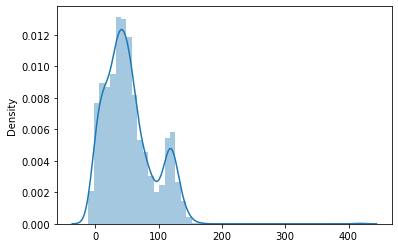

In [56]:
sns.distplot(Datacor2) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

* From the above plots, the dataset as a whole does not follow a normal distribution. Hence, it would be bi modal in nature from the plot alone. We can use Chebyshevs inequality for estimation for better understanding of the dataset.
* The model is bi modal, which means, it has two modes. This would mean that, it follows Chebyshevs rule, 1-1/K, here, K=2. mean ± 2 standard deviations

* We can also normalize the dataset to get a better understanding of the dataset within non standardised scales and to avoid Chebyshevs rule.

In [57]:
# Normalizing the dataset for getting better understanding of the dataset and to tackle Chebyshevs inequality
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler()

In [58]:
Normalized = Datacor2.copy()

In [59]:
# returns z-scores of the values of the attribute
Normalized['P_incidence'] = std_scale.fit_transform(Normalized[['P_incidence']]) 
Normalized['P_tilt'] = std_scale.fit_transform(Normalized[['P_tilt']]) 
Normalized['L_angle'] = std_scale.fit_transform(Normalized[['L_angle']]) 
Normalized['S_slope'] = std_scale.fit_transform(Normalized[['S_slope']]) 
Normalized['P_radius'] = std_scale.fit_transform(Normalized[['P_radius']]) 
Normalized['S_Degree'] = std_scale.fit_transform(Normalized[['S_Degree']]) 

In [60]:
Normalized

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,-0.647896
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,-0.568091
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.725568
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-0.791650
...,...,...,...,...,...,...
305,1.139826,1.641245,1.790676,0.239923,0.577094,1.973295
306,2.032901,2.902995,0.381614,0.445948,-1.597243,1.359695
307,0.790186,0.128191,1.301073,0.919094,0.788596,1.255828
308,1.579575,0.282500,2.261457,1.817689,0.227452,1.344962


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

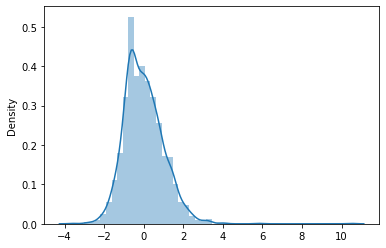

In [61]:
sns.distplot(Normalized) #Plotting graph after normalization

* After normalizing the dataset, it follows a normal distribution. Hence, no need to find Chebyshev's inequality and K value for it.

**BARPLOT OF CLASSES IN DATASET**

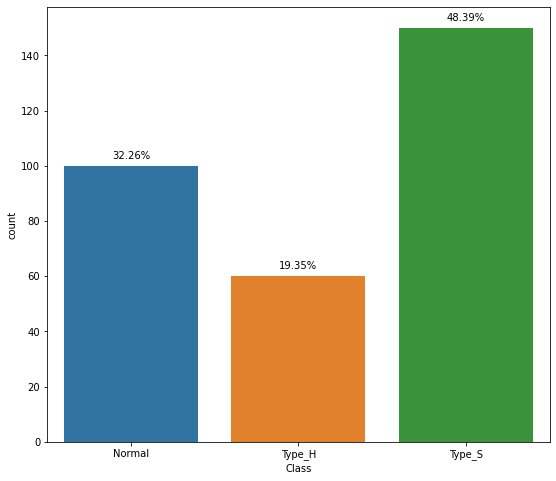

In [62]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(DataBeforeenc['Class'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = DataBeforeenc, x= 'Class') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(DataBeforeenc)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* From the above plot, it is understood that the Type_S is the most occuring Class with 48.3%, followed by Normal with 32.26% and ending with Type_H with 19.35%. This signifies the frequency of occurence of the classes.

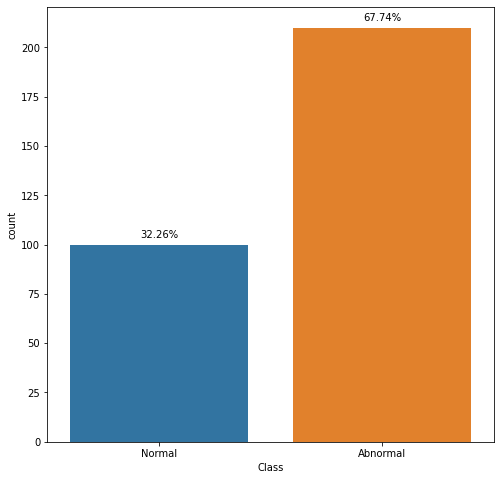

In [63]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(Datacombined2['Class'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = Datacombined2, x= 'Class') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(DataBeforeenc)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* From the above plot, it is understood that the Abnormal is the most occuring Class with 67.74% (Type_S + Type_H), followed by Normal with 32.26%. This signifies the frequency of occurence of the classes.

**MEAN, MEDIAN AND MODE HISTOGRAM**

#### Frequency vs Incidence

Mean:  60.49665292951615 
Median:  58.691038135 
Mode:  26.14792141


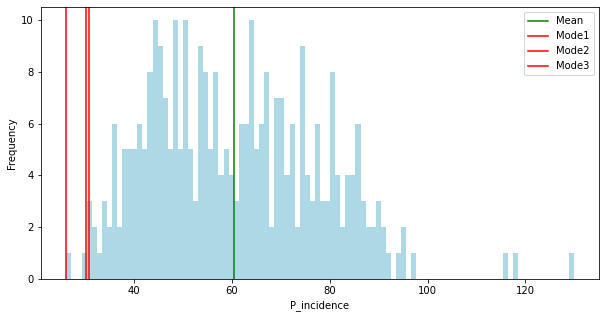

In [64]:
mean=Datacor1['P_incidence'].mean()
median=Datacor1['P_incidence'].median()
mode=Datacor1['P_incidence'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(Datacor1['P_incidence'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(mode[0],color='red',label='Mode1')
plt.axvline(mode[1],color='red',label='Mode2')
plt.axvline(mode[2],color='red',label='Mode3')

plt.xlabel('P_incidence')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (60.4) ~ Median (58.6) != Mode (26.1)
* From the above plot, it is observed that the mean and median are almost equal hence hence it can be considered that, this is almost symmetrical but since theres multiple values of mode and as mode is very far from mean and median, this is multimodal in nature.
* Here since, Mode <  (Median > Mean) - It is slightly Left skewed or Negative Skewness. 

#### Frequency vs Tilt

Mean:  17.542821967970955 
Median:  16.35768863 
Mode:  -6.554948347


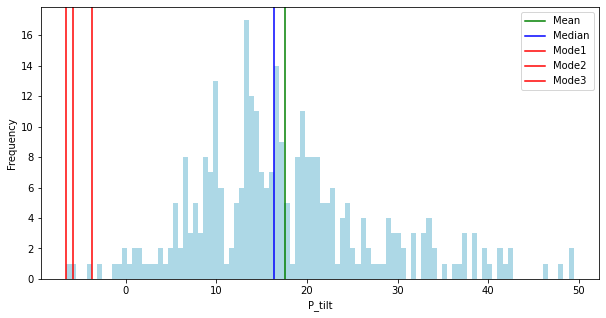

In [65]:
mean=Datacor1['P_tilt'].mean()
median=Datacor1['P_tilt'].median()
mode=Datacor1['P_tilt'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(Datacor1['P_tilt'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')
plt.axvline(mode[1],color='red',label='Mode2')
plt.axvline(mode[2],color='red',label='Mode3')

plt.xlabel('P_tilt')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (17.5) ~ Median (16.3) != Mode (-6.5)
* From the above plot, it is observed that the mean and median are very close hence hence it can be considered that, this is almost symmetrical but since theres multiple values of mode and as mode is very far from mean and median, this is a multimodal in nature.
* Here since, Mode < Median < Mean - It is slightly Right skewed or Postive Skewness. 

#### Frequency vs Angle

Mean:  51.93092960345161 
Median:  49.56239828 
Mode:  35.0


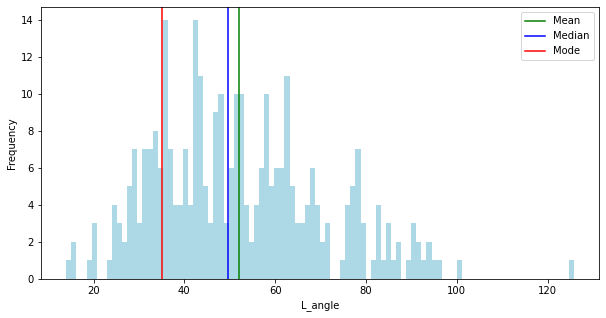

In [66]:
mean=Datacor1['L_angle'].mean()
median=Datacor1['L_angle'].median()
mode=Datacor1['L_angle'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(Datacor1['L_angle'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')    
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('L_angle')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (51.9) ~ Median (49.5) != Mode (35.0)
* From the above plot, it is observed that the mean and median are almost equal hence hence it can be considered that, this is almost symmetrical and also only one mode value, which is very close to mean and median. Hence, This is unimodal and slightly asymmetrical.
* Here since, Mode < Median < Mean - It is slightly Right skewed or Postive Skewness. 

#### Frequency vs Slope

Mean:  42.953830961419364 
Median:  42.404912075 
Mode:  33.11134196


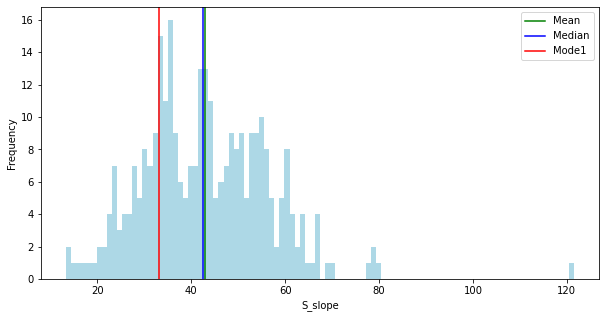

In [67]:
mean=Datacor1['S_slope'].mean()
median=Datacor1['S_slope'].median()
mode=Datacor1['S_slope'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(Datacor1['S_slope'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')    
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')

plt.xlabel('S_slope')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (42.9) ~ Median (42.4) != Mode (33.1)
* From the above plot, it is observed that the mean and median are almost equal hence hence it can be considered that, this is almost symmetrical and also only one mode value, which is very close to mean and median. Hence, This is unimodal and slightly asymmetrical.
* Here since, Mode < Median < Mean - It is slightly Right skewed or Postive Skewness. 

#### Frequency vs Radius

Mean:  117.92065502380646 
Median:  118.2681783 
Mode:  70.08257486


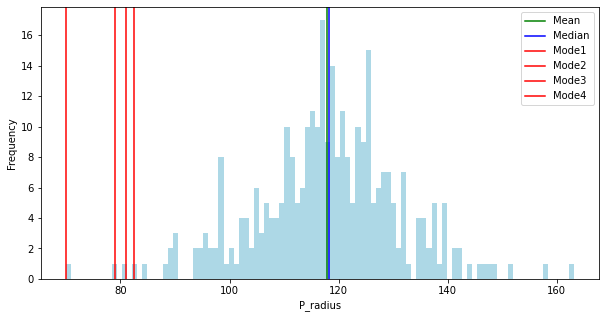

In [68]:
mean=Datacor1['P_radius'].mean()
median=Datacor1['P_radius'].median()
mode=Datacor1['P_radius'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(Datacor1['P_radius'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')
plt.axvline(mode[1],color='red',label='Mode2')
plt.axvline(mode[2],color='red',label='Mode3')
plt.axvline(mode[3],color='red',label='Mode4')

plt.xlabel('P_radius')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (117.9) ~ Median (118.2) != Mode (70.0)
* From the above plot, it is observed that the mean and median are almost equal hence it can be considered that, this is almost symmetrical and also multiple mode values, which is very far to mean and median. Hence, This is multimodal and slightly asymmetrical.
* Here since, Mode <  (Median > Mean) - It is slightly Left skewed or Negative Skewness. 

#### Frequency vs Degree

Mean:  26.296694437867732 
Median:  11.767933769999999 
Mode:  -11.05817866


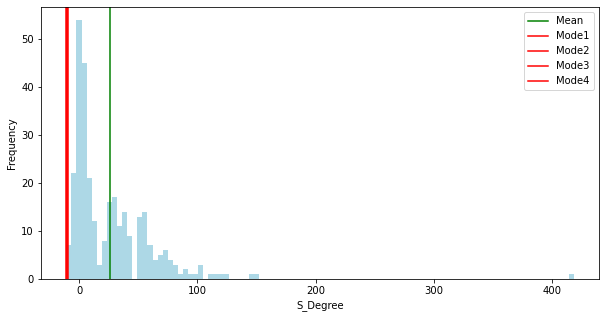

In [69]:
mean=Datacor1['S_Degree'].mean()
median=Datacor1['S_Degree'].median()
mode=Datacor1['S_Degree'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(Datacor1['S_Degree'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')   
plt.axvline(mode[0],color='red',label='Mode1')
plt.axvline(mode[1],color='red',label='Mode2')
plt.axvline(mode[2],color='red',label='Mode3')
plt.axvline(mode[3],color='red',label='Mode4')

plt.xlabel('S_Degree')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (26.2) != Median (11.7) != Mode (-11.0)
* From the above plot, it is observed that the mean and median are not equal hence hence it can be considered that, this is almost Asymmetrical and also only multiple mode values, which is very close to mean and median. Hence, This is multimodal and Asymmetrical.
* Here since, Mode < Median < Mean - It is postively skewed or Right Skewed. 

**BOX PLOT** 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site

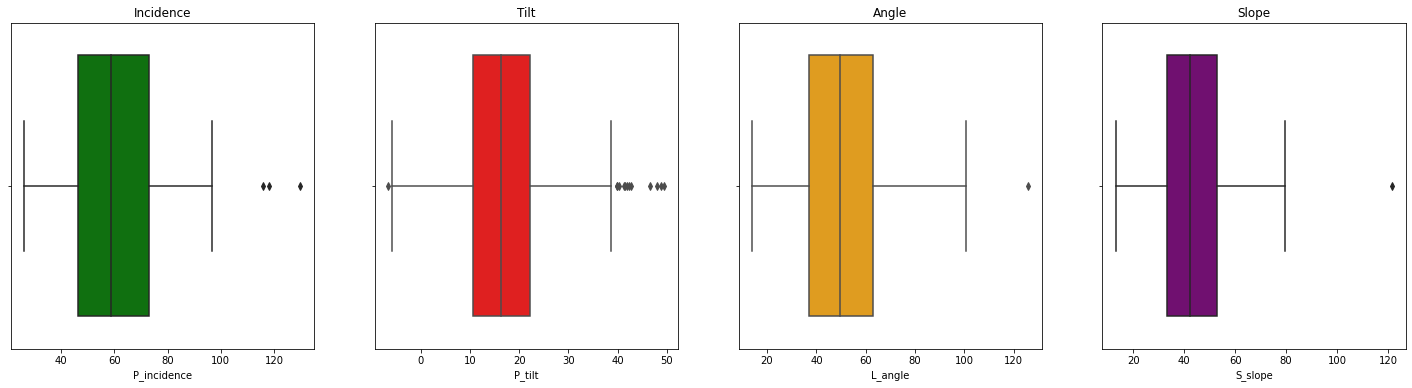

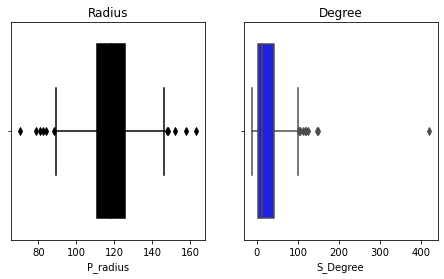

In [70]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
plt.title('Incidence')
sns.boxplot(Datacor1['P_incidence'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Tilt')
sns.boxplot(Datacor1['P_tilt'],orient='vertical',color='red')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Angle')
sns.boxplot(Datacor1['L_angle'],orient='vertical',color='orange')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Slope')
sns.boxplot(Datacor1['S_slope'],orient='vertical',color='purple')

plt.figure(figsize=(16,4))

plt.subplot(1, 4, 1)
plt.title('Radius')
sns.boxplot(Datacor1['P_radius'],orient='vertical',color='black')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Degree')
sns.boxplot(Datacor1['S_Degree'],orient='vertical',color='blue')
plt.show()

In [71]:
# Finding the Interquartile Range for the Dataset
Q1 = Datacor1.quantile(0.25)
Q2 = Datacor1.quantile(0.50)
Q3 = Datacor1.quantile(0.75) 
IQR = Q3 - Q1
IQR

P_incidence     26.447401
P_tilt          11.453326
L_angle         26.000000
S_slope         19.348766
P_radius        14.758478
S_Degree        39.683625
Class_Normal     1.000000
Class_Type_H     0.000000
Class_Type_S     1.000000
dtype: float64

In [72]:
# Finding the Lowerfence values in the Dataset
Lowerfence_inner = Q1-(1.5 * IQR)
Lowerfence_inner

P_incidence      6.759192
P_tilt          -6.512919
L_angle         -2.000000
S_slope          4.323972
P_radius        88.571479
S_Degree       -57.921711
Class_Normal    -1.500000
Class_Type_H     0.000000
Class_Type_S    -1.500000
dtype: float64

In [73]:
# Finding the Upperfence values in the Dataset
Upperfence_inner = Q3+(1.5 * IQR)
Upperfence_inner

P_incidence     112.548797
P_tilt           39.300383
L_angle         102.000000
S_slope          81.719038
P_radius        147.605392
S_Degree        100.812790
Class_Normal      2.500000
Class_Type_H      0.000000
Class_Type_S      2.500000
dtype: float64

**Total number of Upper fence outliers**

In [74]:
# Count of Outliers over the upper fence
countoutup =(Datacor1>Upperfence_inner).sum()
countoutup

P_incidence      3
P_tilt          12
L_angle          1
S_slope          1
P_radius         5
S_Degree        10
Class_Normal     0
Class_Type_H    60
Class_Type_S     0
dtype: int64

**Total number of Lower fence outliers**

In [75]:
# Count of Outliers below the lower fence
countoutdown =(Datacor1<Lowerfence_inner).sum()
countoutdown

P_incidence     0
P_tilt          1
L_angle         0
S_slope         0
P_radius        6
S_Degree        0
Class_Normal    0
Class_Type_H    0
Class_Type_S    0
dtype: int64

**Total number of outliers**

In [76]:
#Count of Total Outliers
Totalout = countoutup + countoutdown
Totalout

P_incidence      3
P_tilt          13
L_angle          1
S_slope          1
P_radius        11
S_Degree        10
Class_Normal     0
Class_Type_H    60
Class_Type_S     0
dtype: int64

**Removing Outliers from the Doutlier dataset**

In [77]:
# We can further remove the outliers for better clarity on the data
Doutlier = Datacor1.copy()
def remove_outliers(Doutlier, q=0.05):
    upper = Doutlier.quantile(1-q)
    lower = Doutlier.quantile(q)
    mask = (Doutlier < upper) & (Doutlier > lower)
    return mask
mask = remove_outliers(Doutlier, 0.1)
Doutlier = Doutlier[mask]

**Boxplot after removing outliers for Doutlier**

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site

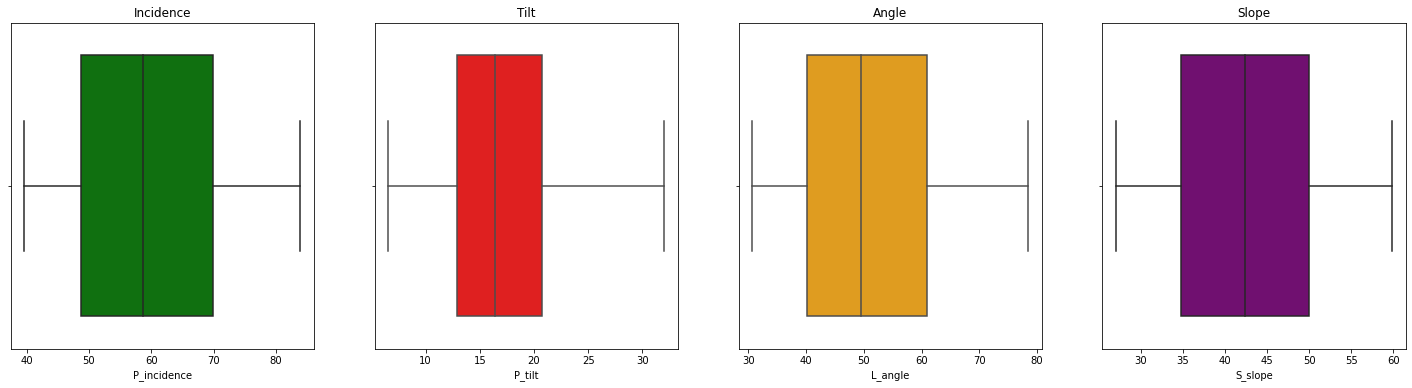

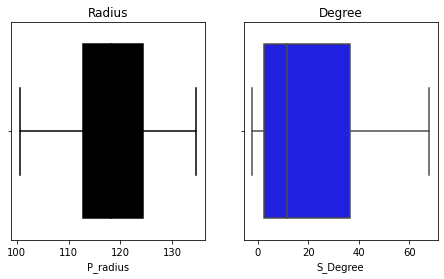

In [78]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
plt.title('Incidence')
sns.boxplot(Doutlier['P_incidence'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Tilt')
sns.boxplot(Doutlier['P_tilt'],orient='vertical',color='red')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Angle')
sns.boxplot(Doutlier['L_angle'],orient='vertical',color='orange')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Slope')
sns.boxplot(Doutlier['S_slope'],orient='vertical',color='purple')

plt.figure(figsize=(16,4))

# subplot 5
plt.subplot(1, 4, 1)
plt.title('Radius')
sns.boxplot(Doutlier['P_radius'],orient='vertical',color='black')

# subplot 6
plt.subplot(1, 4, 2)
plt.title('Degree')
sns.boxplot(Doutlier['S_Degree'],orient='vertical',color='blue')
plt.show()

**Checking for null values**

In [79]:
Doutlier.isnull().sum()

P_incidence      62
P_tilt           62
L_angle          62
S_slope          62
P_radius         62
S_Degree         62
Class_Normal    310
Class_Type_H    310
Class_Type_S    310
dtype: int64

**Dropping categorical attributes**

In [80]:
# Removing One hot encoded categorical data
Doutlier.drop(['Class_Normal', 'Class_Type_H', 'Class_Type_S' ], axis = 1, inplace = True)
Doutlier

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,NaN,16.964297,35.112814,NaN,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,NaN
...,...,...,...,...,...,...
305,80.111572,NaN,NaN,46.169139,125.593624,NaN
306,NaN,NaN,59.000000,48.930176,NaN,NaN
307,74.094731,18.823727,76.032156,55.271004,128.405731,NaN
308,NaN,20.365613,NaN,NaN,120.944829,NaN


**Imputing with mean values**

In [81]:
# Filling the null values with the Mean values as a treatment of the outliers
Doutlier1 = Doutlier.fillna(Doutlier.mean())
Doutlier1

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,59.767420,16.964297,35.112814,42.527066,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,20.808634
...,...,...,...,...,...,...
305,80.111572,16.829839,50.745287,46.169139,125.593624,20.808634
306,59.767420,16.829839,59.000000,48.930176,118.147976,20.808634
307,74.094731,18.823727,76.032156,55.271004,128.405731,20.808634
308,59.767420,20.365613,50.745287,42.527066,120.944829,20.808634


**DISTPLOT FOR SKEWNESS and Kurtosis**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:title={'center':'S_Degree'}, xlabel='S_Degree', ylabel='Density'>

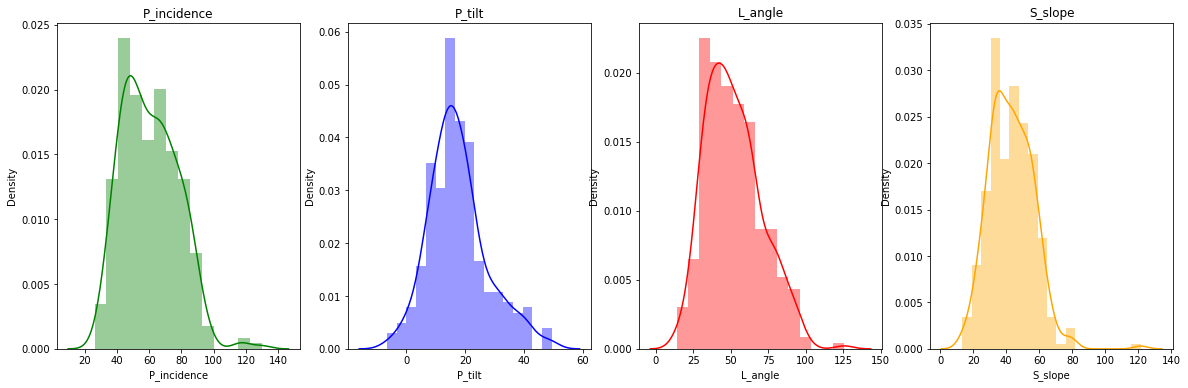

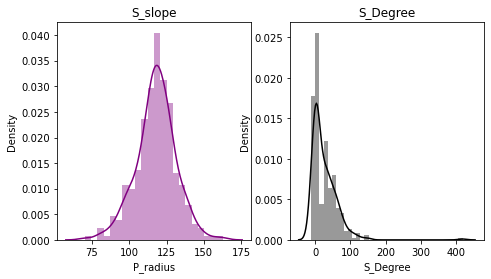

In [82]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('P_incidence')
sns.distplot(Datacor1['P_incidence'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('P_tilt')
sns.distplot(Datacor1['P_tilt'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('L_angle')
sns.distplot(Datacor1['L_angle'],color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('S_slope')
sns.distplot(Datacor1['S_slope'],color='orange')

plt.figure(figsize=(16,4))

# subplot 5
plt.subplot(1, 4, 1)
plt.title('S_slope')
sns.distplot(Datacor1['P_radius'],color='purple')

# subplot 6
plt.subplot(1, 4, 2)
plt.title('S_Degree')
sns.distplot(Datacor1['S_Degree'],color='black')

* From the above Plot, we can get a visual representation of the skewness in the data.

* Skewness is the distortion of symmetry and when skewness value is between 0 to 1 are moderately skewed while greater than 1 or lesser than -1 are highly skewed. Postive and Negative skewness is as per the sign.  

* From the above data, its observed that:

  1) Incidence - It has 3 outliers, and has skew value of 0.520440 which is in moderate Positive Skewness or Rightly Skewed

  2) Tilt - It has 13 outliers, and has a skew value of 0.676553is which is in moderate Positive Skewness or Rightly Skewed

  3) Angle - It has 1 outlier, and has a skew value of 0.5994510 which is in moderate Positive skewness or Rightly Skewed

  4) Slope  - It has  1 outlier, and has a skew value of 0.792577 which is in moderate Positive skewness or Rightly Skewed

  5) Radius  - It has 11 outliers, and has a skew value of -0.176835 is which is in moderate Negative Skewness or Left Skewed

  6) Degree  - It has 10 outliers, and has a skew value of 4.317954 is which is in highly Positive Skewness or Rightly Skewed

* Kurtosis is a measure of tailedness that indicates the sharpness and flatness of peaks, Kurtosis 0 to 1 have flatter peaks while over 1 have sharper peaks and negative Kurtosis have the the least or more flatter peaks

* From the kurtosis above, we can infer that, 

  1) P_incidence - 0.22 signifies moderately flat peak

  2) P_tilt - 0.67 signifies moderately flat peak

  3) L_angle - 0.16 signifies moderately flat peak

  4) S_slope - 3.00 signifies a very sharp peak

  5) P_radius - 0.93 signifies sharp peak since its close to 1

  6) S_Degree - 38.06 signifies extremely sharp peak

**CUMULATIVE DISTRIBUTION**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

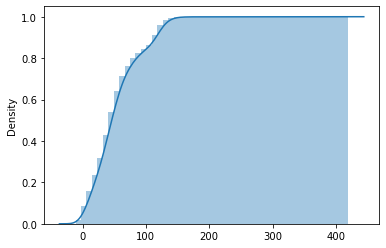

In [83]:
#Cumulative Distribution Plot
sns.distplot(Datacor2, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

* The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.2 Bivariate Analysis
   

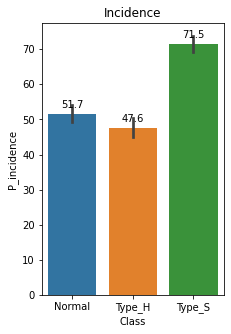

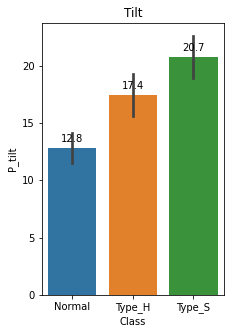

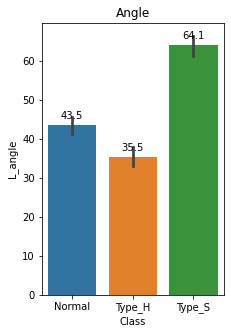

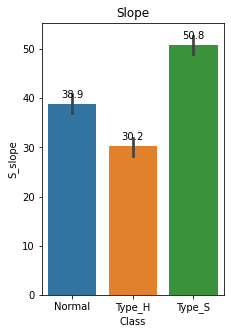

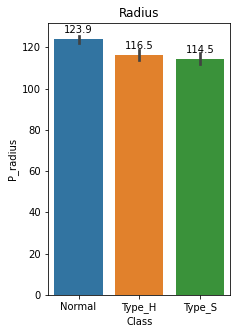

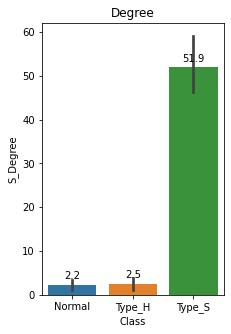

In [84]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(15,5))
# Class Vs Incidence
plt.subplot(1, 4, 1)
plt.title('Incidence')
splot = sns.barplot(x=DataBeforeenc['Class'], y=DataBeforeenc['P_incidence'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# Class Vs Tilt
plt.title('Tilt')
splot = sns.barplot(x=DataBeforeenc['Class'], y=DataBeforeenc['P_tilt'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# Class Vs Angle
plt.subplot(1, 4, 1)
plt.title('Angle')
splot = sns.barplot(x=DataBeforeenc['Class'], y=DataBeforeenc['L_angle'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# Class vs Slope
plt.title('Slope')
splot = sns.barplot(x=DataBeforeenc['Class'], y=DataBeforeenc['S_slope'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# Class Vs Radius
plt.subplot(1, 4, 1)
plt.title('Radius')
splot = sns.barplot(x=DataBeforeenc['Class'], y=DataBeforeenc['P_radius'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# Class vs Degree
plt.title('Degree')
splot = sns.barplot(x=DataBeforeenc['Class'], y=DataBeforeenc['S_Degree'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

* The above plots signify the following:

  1) Incidence - The highest incidence is by the Class "Type_S" - 71.5 , followed by "Normal" - 51.7 and least incidence is the class "Type_H" - 47.6.
  
  2) Tilt - The highest Tilt is by the Class "Type_S" - 20.7, followed by "Type_H" - 17.4 and least Tilt is the class     "Normal" - 12.8.
  
  3) Angle - The highest Angle is by the Class "Type_S" - 64.1, followed by "Normal" - 43.5 and least Angle is the class   "Type_H" - 35.5.
  
  4) Slope - The highest Slope is by the Class "Type_S" - 50.8, followed by "Normal" - 38.9 and least Slope is the class   "Type_H" - 30.2.
  
  5) Radius - The highest Radius is by the Class "Normal" - 123.9, followed by "Type_H" - 116.5 and least Radius is the class   "Type_S" - 114.5.
  
  6) Degree - The highest Degree is by the Class "Type_S" - 51.9, followed by "Type_H" - 2.5 and least Degree is the class   "Normal" - 2.2.

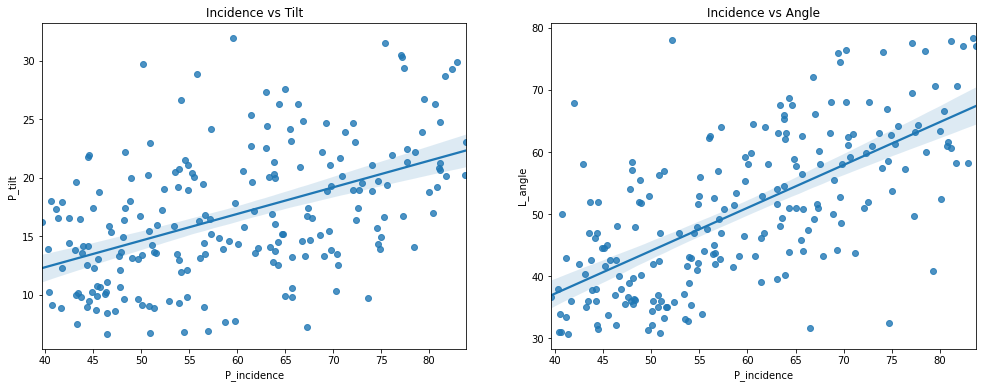

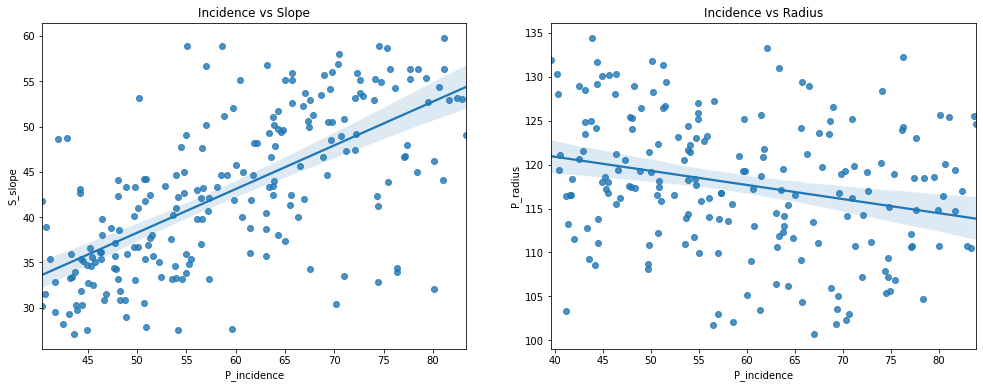

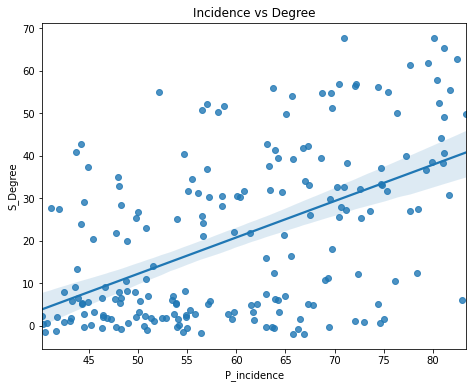

In [85]:
# Regression plot with Incidence
plt.figure(figsize=(35,6))

# Incidence vs Tilt
plt.subplot(1, 4, 1)
plt.title('Incidence vs Tilt')
ax = sns.regplot(x=Doutlier['P_incidence'],y='P_tilt', data=Doutlier)
# Incidence vs Angle
plt.subplot(1, 4, 2)
plt.title('Incidence vs Angle')
ax = sns.regplot(x=Doutlier['P_incidence'],y='L_angle', data=Doutlier)

plt.figure(figsize=(35,6))
# Incidence vs Slope
plt.subplot(1, 4, 1)
plt.title('Incidence vs Slope')
ax = sns.regplot(x=Doutlier['P_incidence'],y='S_slope', data=Doutlier)

# Incidence vs Radius
plt.subplot(1, 4, 2)
plt.title('Incidence vs Radius')
ax = sns.regplot(x=Doutlier['P_incidence'],y='P_radius', data=Doutlier)

plt.figure(figsize=(35,6))
# Incidence vs Degree
plt.subplot(1, 4, 1)
plt.title('Incidence vs Degree')
ax = sns.regplot(x=Doutlier['P_incidence'],y='S_Degree', data=Doutlier)

* The above plots indicate a relation between incidence and every other attribute:

  1) Incidence vs Tilt - They have a positive correlation with one another, as the line is increasing. However, the increase is only moderate. Hence, moderately correlated to each other.

  2) Incidence vs Angle - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.
 
  3) Incidence vs Slope - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  4) Incidence vs Radius - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation.

  5) Incidence vs Degree - They have a positive correlation with one another, as the line is increasing. However, the increase is only moderate. Hence, moderately correlated to each other.

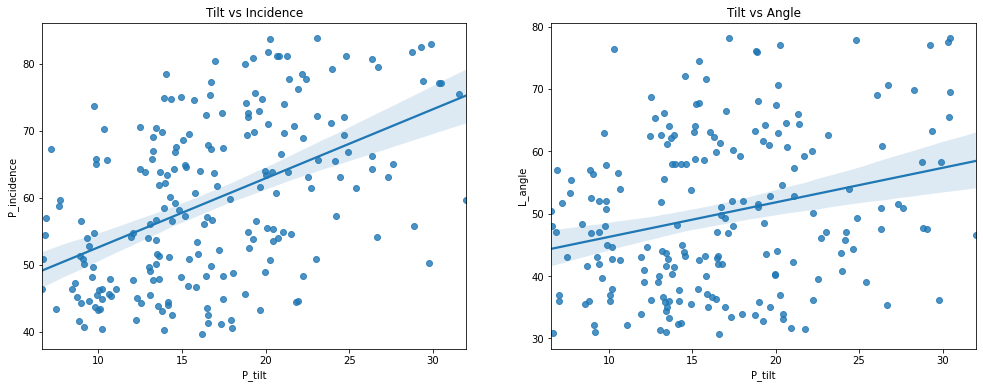

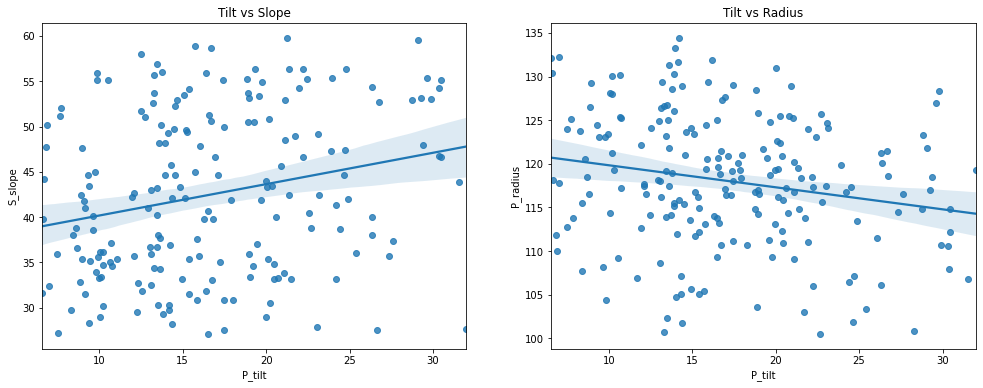

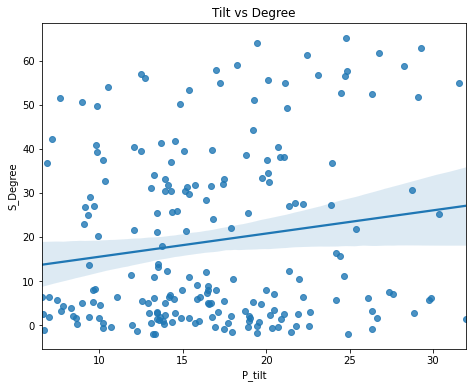

In [86]:
# Regression plot with Tilt
plt.figure(figsize=(35,6))

# Tilt vs Incidence
plt.subplot(1, 4, 1)
plt.title('Tilt vs Incidence')
ax = sns.regplot(x=Doutlier['P_tilt'],y='P_incidence', data=Doutlier)
# Tilt vs Angle
plt.subplot(1, 4, 2)
plt.title('Tilt vs Angle')
ax = sns.regplot(x=Doutlier['P_tilt'],y='L_angle', data=Doutlier)

plt.figure(figsize=(35,6))
# Tilt vs Slope
plt.subplot(1, 4, 1)
plt.title('Tilt vs Slope')
ax = sns.regplot(x=Doutlier['P_tilt'],y='S_slope', data=Doutlier)

# Tilt vs Radius
plt.subplot(1, 4, 2)
plt.title('Tilt vs Radius')
ax = sns.regplot(x=Doutlier['P_tilt'],y='P_radius', data=Doutlier)

plt.figure(figsize=(35,6))
# Tilt vs Degree
plt.subplot(1, 4, 1)
plt.title('Tilt vs Degree')
ax = sns.regplot(x=Doutlier['P_tilt'],y='S_Degree', data=Doutlier)

* The above plots indicate a relation between Tilt and every other attribute:

  1) Tilt vs Incidence - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  2) Tilt vs Angle - They have a positive correlation with one another, as the line is increasing. However, the increase is only moderate. Hence, moderately correlated to each other.
 
  3) Tilt vs Slope - They have a positive correlation with one another, as the line is increasing. However, the increase is only moderate. Hence, moderately correlated to each other.

  4) Tilt vs Radius - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation.

  5) Tilt vs Degree - They have a positive correlation with one another, as the line is increasing. However, the increase is only moderate. Hence, moderately correlated to each other.

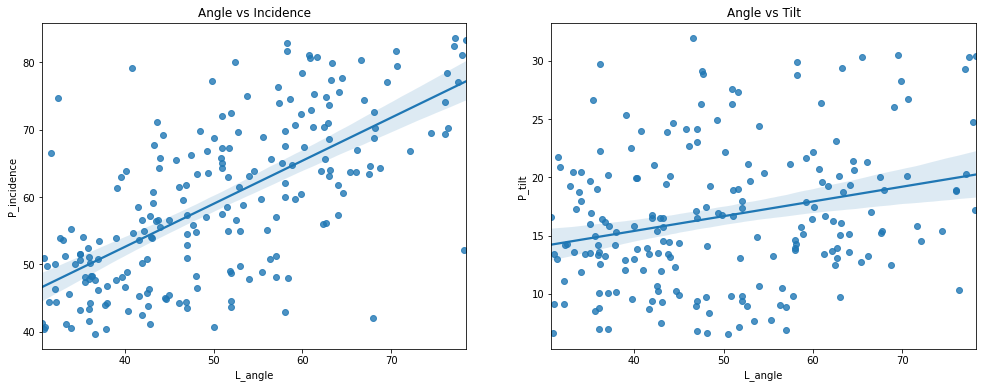

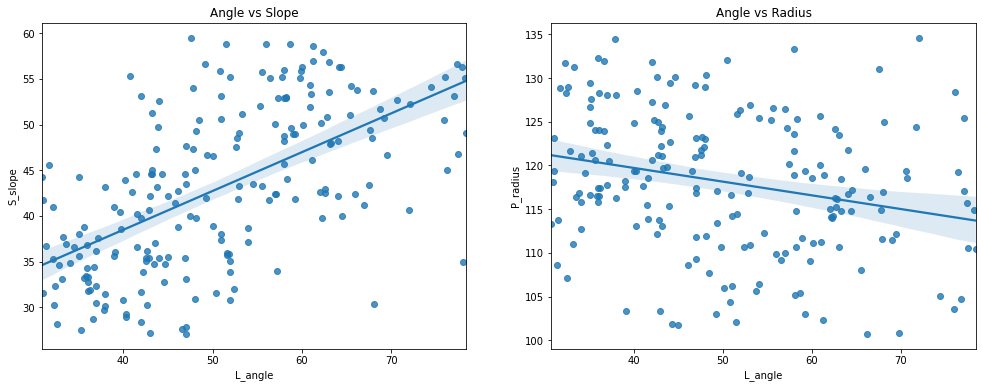

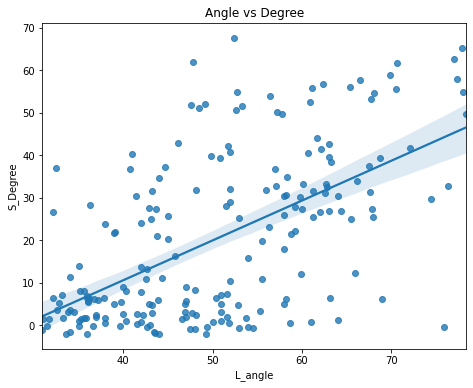

In [87]:
# Regression plot with Angle
plt.figure(figsize=(35,6))

# Angle vs Incidence
plt.subplot(1, 4, 1)
plt.title('Angle vs Incidence')
ax = sns.regplot(x=Doutlier['L_angle'],y='P_incidence', data=Doutlier)
# Angle vs Tilt
plt.subplot(1, 4, 2)
plt.title('Angle vs Tilt')
ax = sns.regplot(x=Doutlier['L_angle'],y='P_tilt', data=Doutlier)

plt.figure(figsize=(35,6))
# Angle vs Slope
plt.subplot(1, 4, 1)
plt.title('Angle vs Slope')
ax = sns.regplot(x=Doutlier['L_angle'],y='S_slope', data=Doutlier)

# Angle vs Radius
plt.subplot(1, 4, 2)
plt.title('Angle vs Radius')
ax = sns.regplot(x=Doutlier['L_angle'],y='P_radius', data=Doutlier)

plt.figure(figsize=(35,6))
# Angle vs Degree
plt.subplot(1, 4, 1)
plt.title('Angle vs Degree')
ax = sns.regplot(x=Doutlier['L_angle'],y='S_Degree', data=Doutlier)

* The above plots indicate a relation between Tilt and every other attribute:

  1) Angle vs Incidence - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  2) Angle vs Tilt - They have a positive correlation with one another, as the line is increasing. However, the increase is only moderate. Hence, moderately correlated to each other.
 
  3) Angle vs Slope - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  4) Angle vs Radius - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation.

  5) Angle vs Degree - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

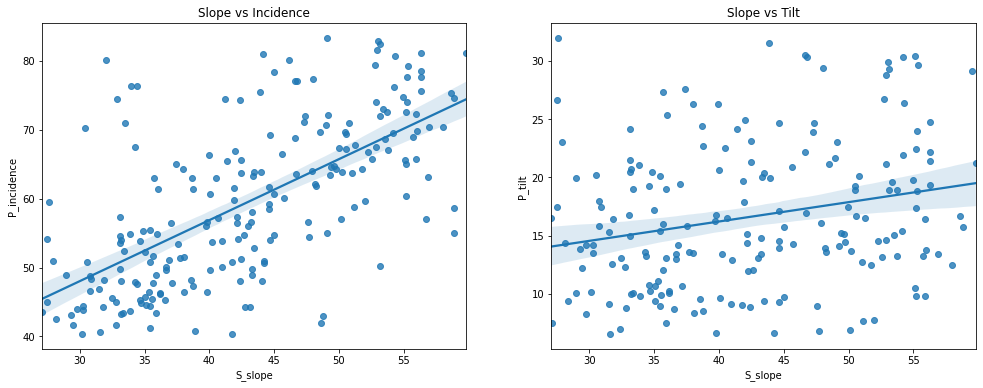

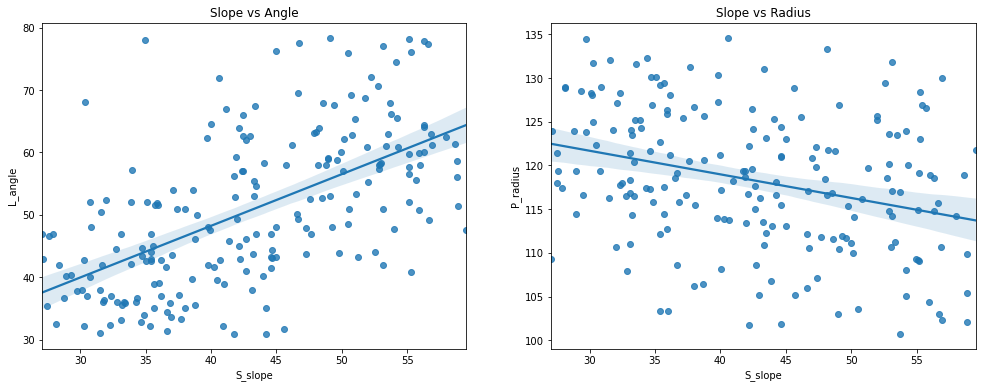

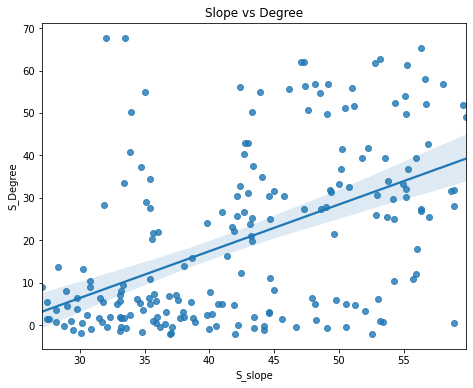

In [88]:
# Regression plot with Slope
plt.figure(figsize=(35,6))

# Slope vs Incidence
plt.subplot(1, 4, 1)
plt.title('Slope vs Incidence')
ax = sns.regplot(x=Doutlier['S_slope'],y='P_incidence', data=Doutlier)
# Slope vs Tilt
plt.subplot(1, 4, 2)
plt.title('Slope vs Tilt')
ax = sns.regplot(x=Doutlier['S_slope'],y='P_tilt', data=Doutlier)

plt.figure(figsize=(35,6))
# Slope vs Angle
plt.subplot(1, 4, 1)
plt.title('Slope vs Angle')
ax = sns.regplot(x=Doutlier['S_slope'],y='L_angle', data=Doutlier)

# Slope vs Radius
plt.subplot(1, 4, 2)
plt.title('Slope vs Radius')
ax = sns.regplot(x=Doutlier['S_slope'],y='P_radius', data=Doutlier)

plt.figure(figsize=(35,6))
# Slope vs Degree
plt.subplot(1, 4, 1)
plt.title('Slope vs Degree')
ax = sns.regplot(x=Doutlier['S_slope'],y='S_Degree', data=Doutlier)

* The above plots indicate a relation between Tilt and every other attribute:

  1) Slope vs Incidence - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  2) Slope vs Tilt - They have a positive correlation with one another, as the line is increasing. However, the increase is only moderate. Hence, moderately correlated to each other.
 
  3) Slope vs Angle - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  4) Slope vs Radius - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation.

  5) Slope vs Degree - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

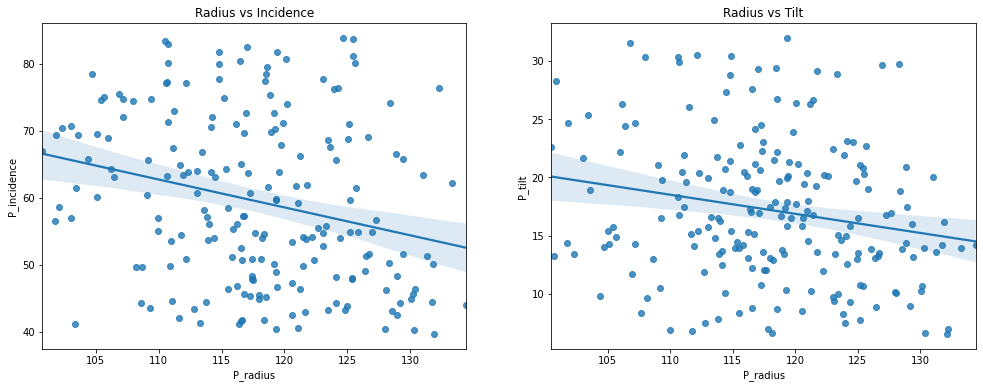

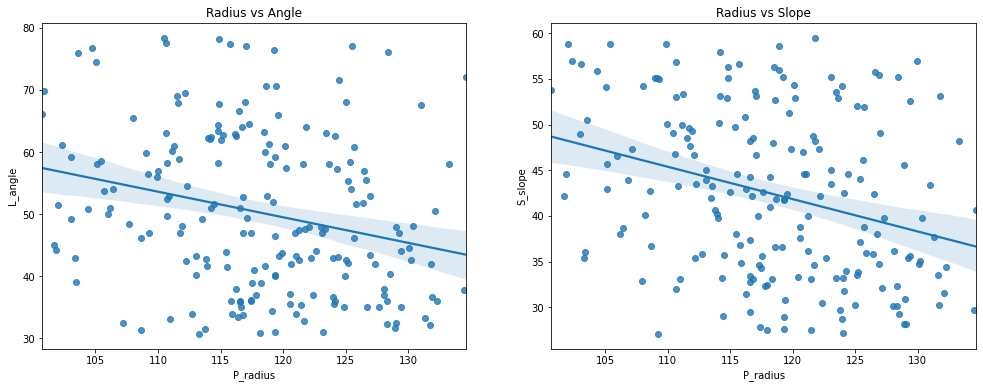

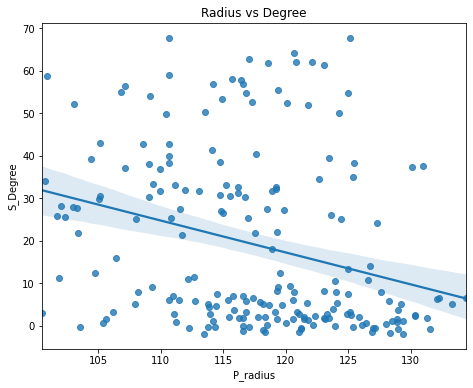

In [89]:
# Regression plot with Radius
plt.figure(figsize=(35,6))

# Radius vs Incidence
plt.subplot(1, 4, 1)
plt.title('Radius vs Incidence')
ax = sns.regplot(x=Doutlier['P_radius'],y='P_incidence', data=Doutlier)
# Radius vs Tilt
plt.subplot(1, 4, 2)
plt.title('Radius vs Tilt')
ax = sns.regplot(x=Doutlier['P_radius'],y='P_tilt', data=Doutlier)

plt.figure(figsize=(35,6))
# Radius vs Anlge
plt.subplot(1, 4, 1)
plt.title('Radius vs Angle')
ax = sns.regplot(x=Doutlier['P_radius'],y='L_angle', data=Doutlier)

# Radius vs Slope
plt.subplot(1, 4, 2)
plt.title('Radius vs Slope')
ax = sns.regplot(x=Doutlier['P_radius'],y='S_slope', data=Doutlier)

plt.figure(figsize=(35,6))
# Tilt vs Degree
plt.subplot(1, 4, 1)
plt.title('Radius vs Degree')
ax = sns.regplot(x=Doutlier['P_radius'],y='S_Degree', data=Doutlier)

* The above plots indicate a relation between Tilt and every other attribute:

  1) Radius vs Incidence - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation.

  2) Radius vs Tilt - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation.
 
  3) Radius vs Angle - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation..

  4) Radius vs Slope - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation.

  5) Radius vs Degree - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only Higher in comparison to the other attributes. Hence, High negative correlation.

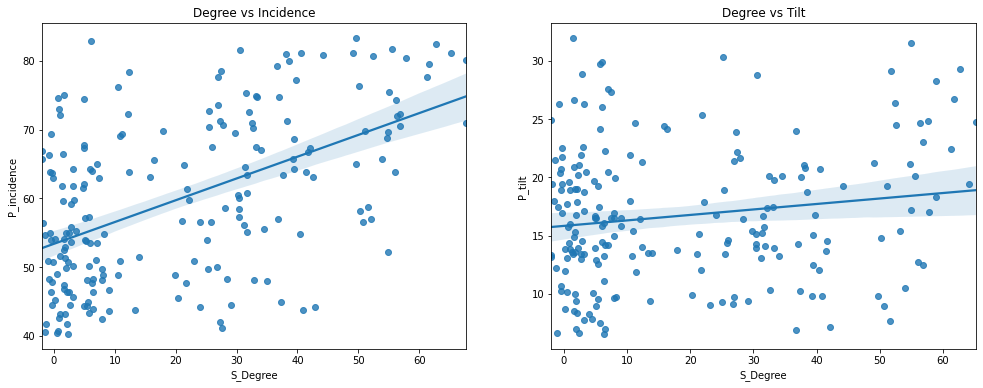

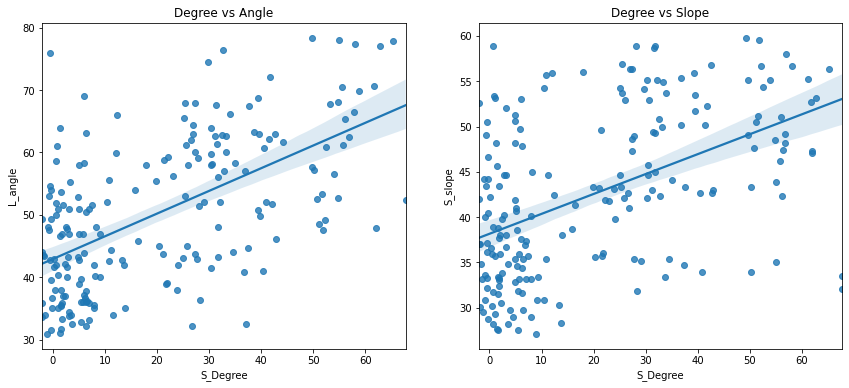

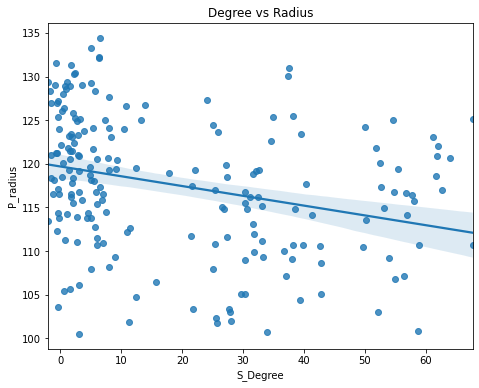

In [90]:
# Regression plot with Degree
plt.figure(figsize=(35,6))

# Degree vs Incidence
plt.subplot(1, 4, 1)
plt.title('Degree vs Incidence')
ax = sns.regplot(x=Doutlier['S_Degree'],y='P_incidence', data=Doutlier)
# Degree vs Tilt
plt.subplot(1, 4, 2)
plt.title('Degree vs Tilt')
ax = sns.regplot(x=Doutlier['S_Degree'],y='P_tilt', data=Doutlier)

plt.figure(figsize=(30,6))
# Degree vs Anlge
plt.subplot(1, 4, 1)
plt.title('Degree vs Angle')
ax = sns.regplot(x=Doutlier['S_Degree'],y='L_angle', data=Doutlier)

# Degree vs Slope
plt.subplot(1, 4, 2)
plt.title('Degree vs Slope')
ax = sns.regplot(x=Doutlier['S_Degree'],y='S_slope', data=Doutlier)

plt.figure(figsize=(35,6))
# Degree vs Radius
plt.subplot(1, 4, 1)
plt.title('Degree vs Radius')
ax = sns.regplot(x=Doutlier['S_Degree'],y='P_radius', data=Doutlier)

* The above plots indicate a relation between Tilt and every other attribute:

  1) Degree vs Incidence - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  2) Degree vs Tilt - They have a positive correlation with one another, as the line is increasing. However, the increase is only moderate. Hence, moderately correlated to each other.
 
  3) Degree vs Angle - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  4) Degree vs Slope - They have a positive correlation with one another, as the line is increasing. However, the increase is much higher. Hence, highly correlated to each other.

  5) Degree vs Radius - They have a negative correlation with one another, as the line is decreasing. However, the decrease is only moderate. Hence, moderate negative correlation.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.3 Multivariate Analysis

**Facet Grid for multivariate Analysis**

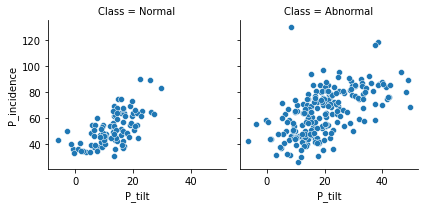

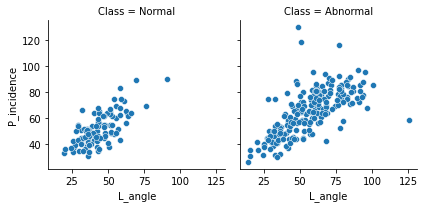

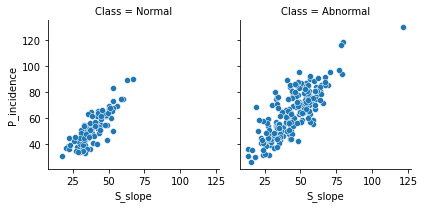

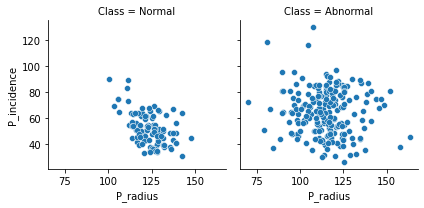

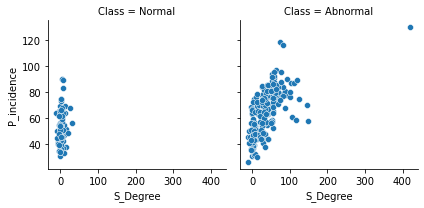

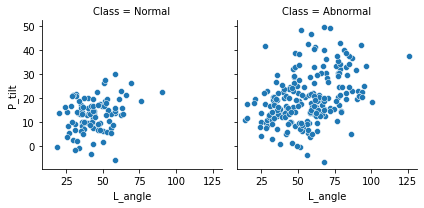

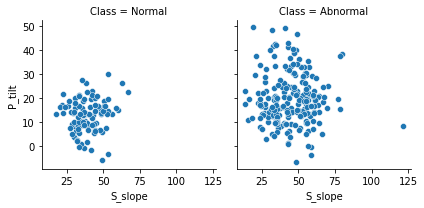

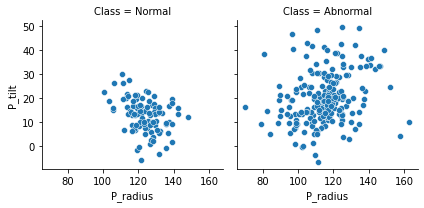

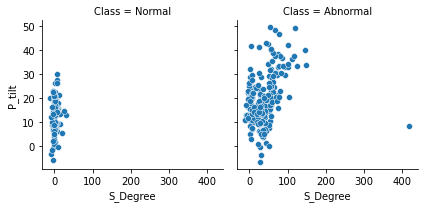

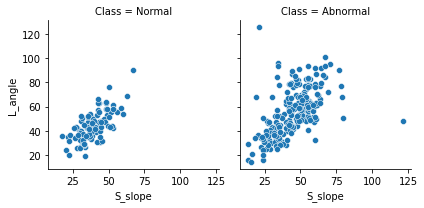

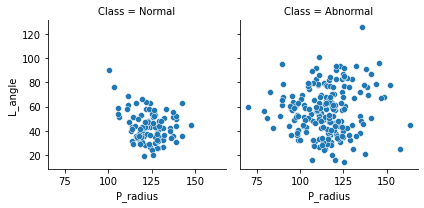

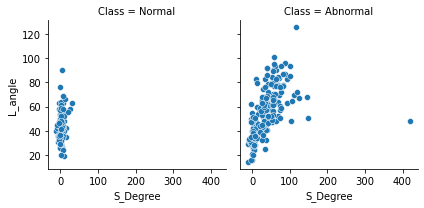

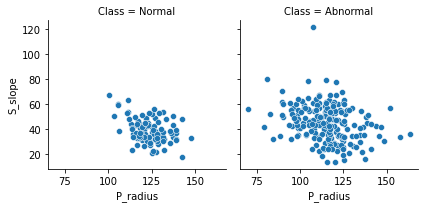

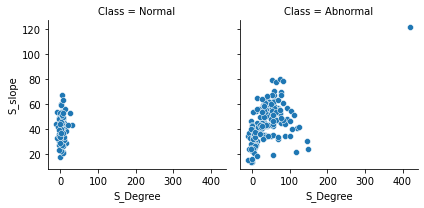

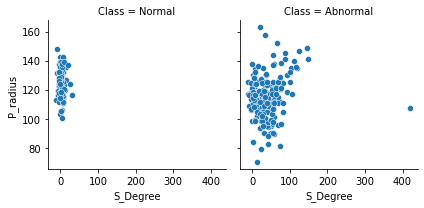

In [91]:
# Displaying the scatterplots for all combination of attributes between Normal and Abnormal
for y in range(len(Datacombined2.columns[:-1])):
    for x in range(len(Datacombined2.columns[:-1])):
        if x>y:
            g = sns.FacetGrid(Datacombined2, col="Class")
            g.map(sns.scatterplot, Datacombined2.columns[:-1][x], Datacombined2.columns[:-1][y])
            plt.show()

* In this we compare Normal and Abnormal classes against every other attribute.

**For Class = Normal**, 

  1) Incidence vs Tilt has lots of spread and in positive correlation.
  2) Incidence vs Angle has lots of spread and in positive correlation.
  3) Incidencevs Slope has less spread and in positive correlation
  4) Incidence vs Radius has lots of spread and in negative correlation 
  5) Incidence  vs Degree has 0 correlation because its vertically arranged.
 
  6) Tilt vs Angle has lots of spread and in positive correlation.
  7) Tilt vs Slope has lots of spread and correlation of 0
  8) Tilt vs Radius has lots of spread and is in negative correlation
  9) Tilt vs Degree has 0 correlation because its vertically arranged.
  
  10) Angle vs Slope has less spread and is in positive correlation
  11) Angle vs Radius has lots of spread and is in negative correlation
  12) Angle vs Degree has 0 correlation because its vertically arranged.
  
  13) Slope vs Radius has lots of spread and has negative correlation but nearly 0 as its circular in shape and data properly interpretable
  14) Slope vs Degree has 0 correlation because its vertically arranged.
  
  15) Radius vs Degree has 0 correlation because its vertically arranged.
  
**For Class = Abnormal**, 


  1) Incidence vs Tilt has lots of spread and in positive correlation.
  2) Incidence vs Angle has lots of spread and in positive correlation.
  3) Incidencevs Slope has less spread and in positive correlation
  4) Incidence vs Radius has lots of spread and in negative correlation but nearly 0 as its circular in shape and data properly.
  5) Incidence  vs Degree has slightly positive correlation but nearly 0.
 
  6) Tilt vs Angle has lots of spread and in positive correlation.
  7) Tilt vs Slope has lots of spread andcorrelation of 0
  8) Tilt vs Radius has lots of spread and is in positive correlation
  9) Tilt vs Degree has 0 correlation because its vertically arranged.
  
  10) Angle vs Slope has correlation of 0 because its 
  11) Angle vs Radius has lots of spread and correlation of 0
  12) Angle vs Degree has slightly positive correlation but nearly 0.
  
  13) Slope vs Radius has lots of spread and has negative correlation but nearly 0 as its circular in shape and data properly interpretable
  14) Slope vs Degree has slightly positive correlation but nearly 0.
  
  15) Radius vs Degree has slightly positive correlation but nearly 0.

**Pairplot for checking the correlation**

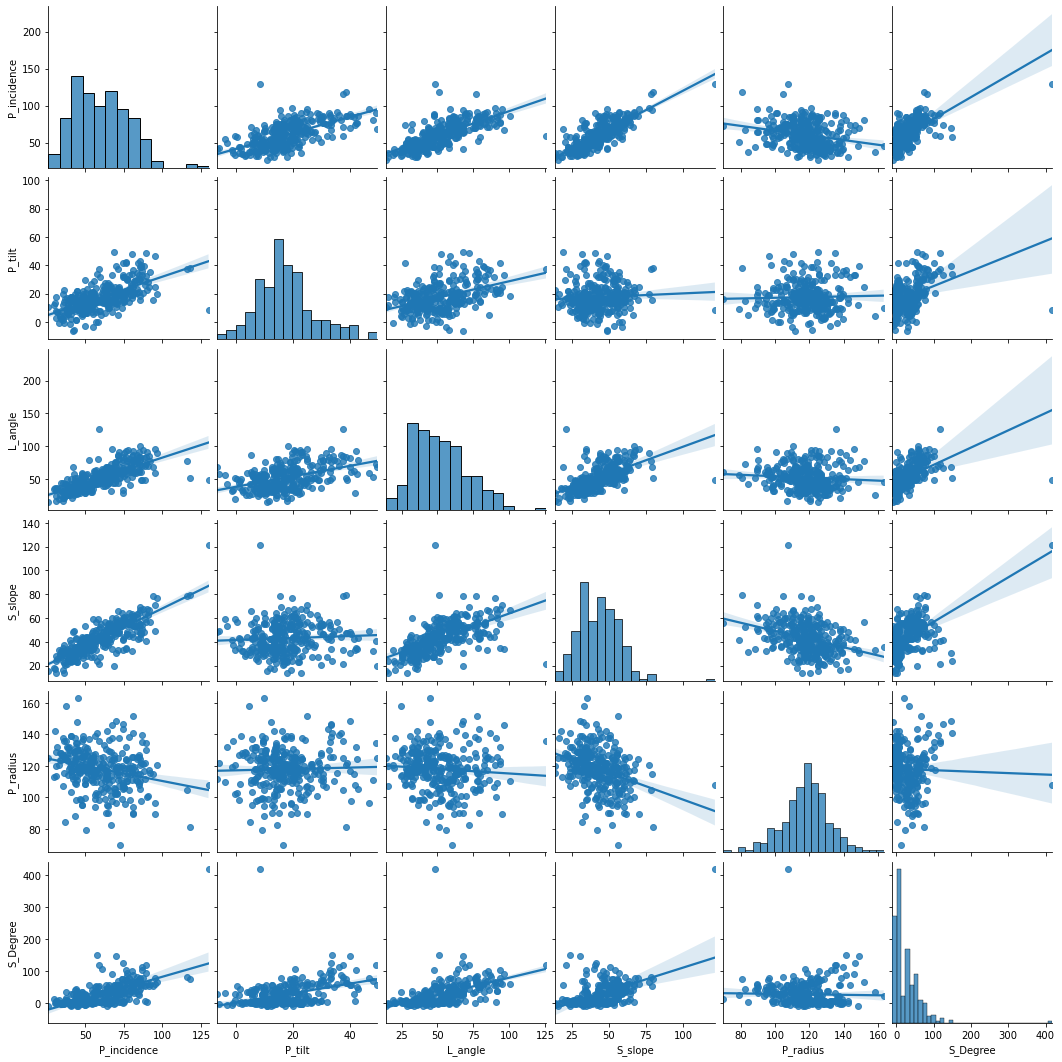

In [92]:
sns.pairplot(Datacor2, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

* The above plot is not easy to understand due to many outliers and attributes present

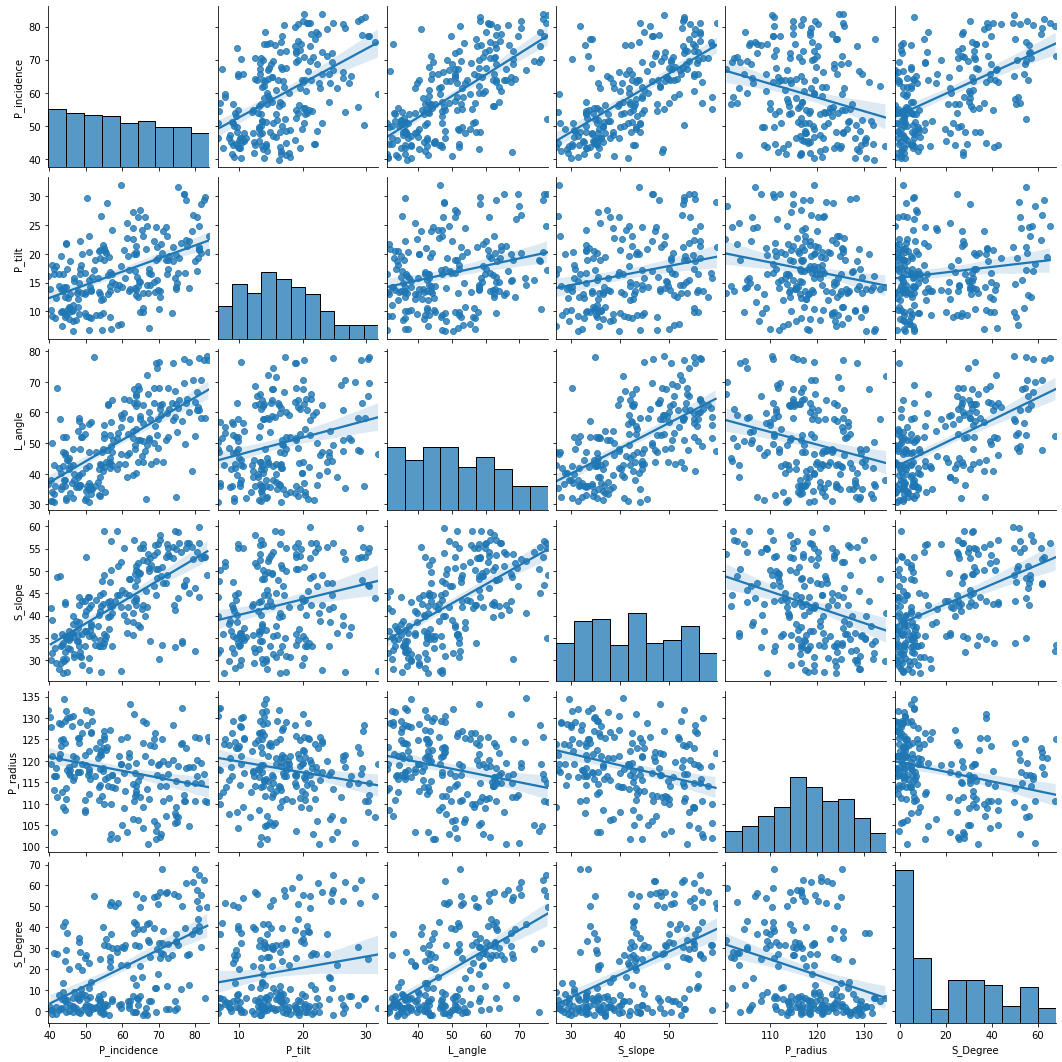

In [93]:
# We will use the dataset with the outliers removed for a better visual understanding of the data
sns.pairplot(Doutlier, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

* From the above plot, we are able to understand the relationship between each and every attribute in the dataset clearly. In this case: 

1) P_Incidence : positive correlation with P_tilt, L_angle, S_slope and S_Degree but negative correlation with P_radius

2) P_tilt : positive correlation with P_Incidence, L_angle, S_slope and S_Degree but negative correlation with P_radius

3) L_angle: positive correlation with P_Incidence, P_tilt, S_slope and S_Degree but negative correlation with P_radius

4) S_slope: positive correlation with P_Incidence, P_tilt, L_angle and S_Degree but negative correlation with P_radius

5) P_radius: negative correlation with all the attributes -> P_Incidence, P_tilt, L_angle, S_slope and S_Degree

6) S_Degree: positive correlation with P_Incidence, P_tilt, S_slope and L_angle but negative correlation with P_radius

**Correlation heatmap**

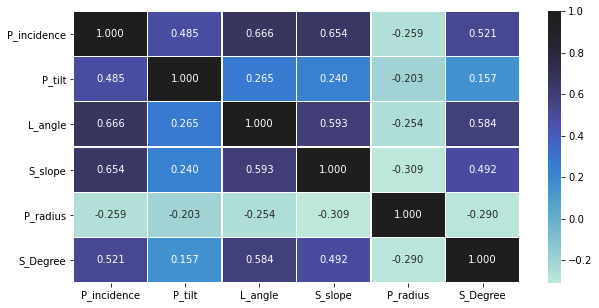

In [94]:
# Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(Doutlier.corr(), annot=True, linewidths=.5, fmt= '.3f', center = 1 )  # heatmap
plt.show()

* From the above heatmap, it is observed that the radius is in negative correation with everything, while the rest have moderate or high correlation with each other. 

* The darker color indicates higher correlation and lighter color indicates lower correlation

**Spearman Correlation Rank Heatmap**

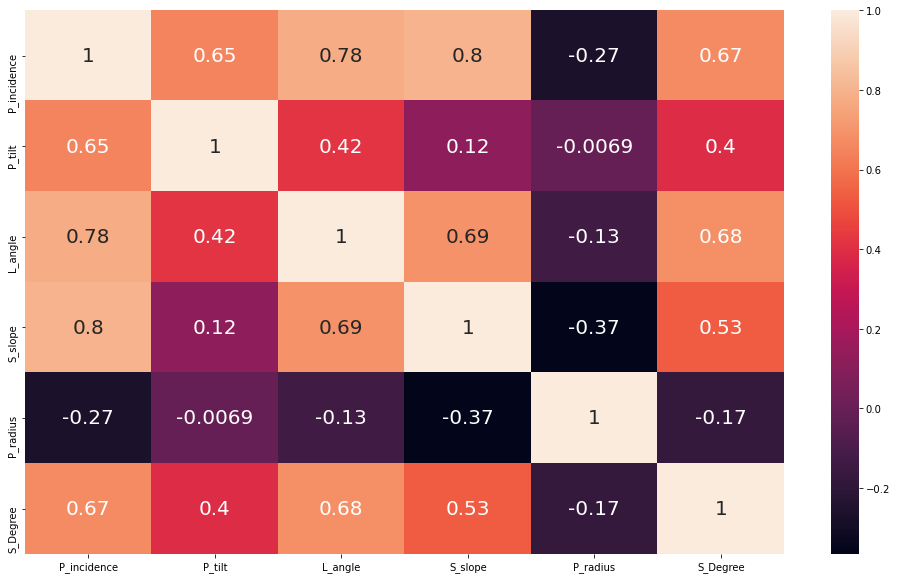

In [95]:
plt.figure(figsize=(17,10))
corr = Datacor2.corr(method = 'spearman')

sns.heatmap(corr, annot = True,annot_kws={'size': 20})

plt.show()

* The Spearmans correlation heatmap will gave based on the Spearman Coefficient (Rho) and the correlation is between 0 to 1 and can be negative or positive to indicate negative or positive correlation.

* From the above heatmap, it is observed that the P_radius has all values with negative correlation while P_incidence has the best average correlation value.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.4 Comments for Statistical Univariate ,Bivariate and Multivariate analysis

<font size="3">• The statistical Univariate ,Bivariate ,and Multivariate analysis is crucial for understanding the dataset, using this, we can find hidden patterns and how the different attributes are related to one other. </font>

<font size="3"><b>Univariate Analysis</b></font>

<font size="3"><b>1)</b> We had used distplot on the dataset to understand the shape of the dataset. It turned out to be a bimodal in nature, hence would not be following normal distribution by default and have to use Chebyshevs Inequality rule to understand the nature of the dataset. But that was not performed, instead the data was normalized to make it easier for model building and further analysis. </font>
    
<font size="3"><b>2)</b> We had plotted bargraph of the class attribute as it is a categorical attribute and gain an understanding of the proportion of the categories, where Type_S = 48.3%, Type_H = 19.35%, and Normal = 32.36%, also another bargraph was plotted in which the Type_S and Type_H categories were labelled under 'Abnormal' and had 67.74%. This gives us insight that the Abnormal categories and in that Type_S had the highest proportion, followed by Normal and Type_S. </font>   

<font size="3"><b>3)</b> We had plotted a histogram for mean, median and mode to understand the positions of the mean,median and mode in the dataset with respect to the attributes. It was observed that for 
    
><i>P_incidence</i> had slightly left/negative skewness,
    
><i>P_tilt</i> had slightly right/postive skewness,
    
><i>L_angle</i> had slightly right/positive skewness,
    
><i>S_slope</i> had slightly right/positive skewness,
    
><i>P_radius</i> had slightly left/negative skewness,
    
><i>S_Degree</i> had high right/positive skewness.</font> 

<font size="3"><b>4)</b> We had plotted a boxplot for all the attributes in the dataset and found that there are a lot of outliers, Interquartile range (IQR) was calculated for each attribute and using that, the outliers in the lower and upper fence were estimated. It is found that the total number of outliers in the dataset were as follows:  
    
>P_incidence had 3 outliers,
    
>P_tilt had 13 outliers,
    
>L_angle had 1 outlier,
    
>S_slope had 1 outlier,
    
>P_radius had 11 outliers,
    
>S_Degree had 10 outliers.
    
These outliers were removed from the dataset and imputed with the mean values.</font>   

<font size="3"><b>5)</b> We had plotted a distplot for checking the skewness and kurtosis of the attributes in the dataset, the P_incidence, P_tilt, L_angle, S_slope, P_radius, S_Degree had the skewness of 
    
><i>P_incidence</i>(0.520440) = right/positive skewness,
    
><i>P_tilt</i>(0.676553) = right/positive skewness,
    
><i>L_angle</i>(0.5994510) = right/positive skewness, 
    
><i>S_slope</i>(0.792577) = right/positive skewness, 
    
><i>P_radius</i>(-0.176835) = Left/negative skewness, 
    
><i>S_Degree</i>(4.317954)= high right/positive skewness. 
    
    
The Kurtosis values are as follows,    
>P_incidence = 0.22 signifies moderately flat peak, 
    
>P_tilt = 0.67 signifies moderately flat peak, 
    
>L_angle = 0.16 signifies moderately flat peak, 
    
>S_slope = 3.00 signifies a very sharp peak,
    
>P_radius = 0.93 signifies sharp peak since its close to 1,
    
>S_Degree = 38.06 signifies extremely sharp peak.</font> 

<font size="3"><b>6)</b> We had plotted a cumulative distribution plot is used to show the data in dataset from lowest to highest value in a single plot.</font>   

<font size="3"><b>Bivariate Analysis</b></font>

<font size="3"><b>1)</b> We had used a barplot checking the relation between classes "Type_H", "Type_S", and "Normal" to the rest of the attributes in the dataset. 
    
>For <i>P_incidence</i> Class "Type_S" = 71.5 , followed by "Normal" = 51.7 and least incidence is the class "Type_H" = 47.6.
    
>For Class <i>P_tilt</i> "Type_S" = 20.7, followed by "Type_H" = 17.4 and least Tilt is the class "Normal" = 12.8. 
    
>For Class <i>L_angle</i> "Type_S" = 64.1, followed by "Normal" = 43.5 and least Angle is the class "Type_H" = 35.5. 
    
>For Class <i>S_slope</i> "Type_S" = 50.8, followed by "Normal" = 38.9 and least Slope is the class "Type_H" =30.2. 

>For Class <i>P_radius</i> "Normal" = 123.9, followed by "Type_H" = 116.5 and least Radius is the class "Type_S" = 114.5. 
    
>For Class <i>S_Degree</i> "Type_S" = 51.9, followed by "Type_H" = 2.5 and least Degree is the class "Normal" = 2.2.</font>

<font size="3"><b>2)</b> We had used a Regressionplot for all attributes against one another. These are the following observations:
    
>Incidence vs Tilt are moderately correlated (+Ve), Incidence vs Angle are moderately correlated (+Ve), Incidence vs Slope are highly correlated (+Ve), Incidence vs Radius are negatively correlated (-Ve), and Incidence vs Degree are moderately correlated (+Ve)

>Tilt vs Incidence are highly correlated (+Ve), Tilt vs Angle are moderately correlated (+Ve), Tilt vs Slope are moderately correlated (+Ve), Tilt vs Radius are negatively correlated (-Ve), and Tilt vs Degree are moderately correlated (+Ve).
    
>Angle vs Incidence are moderately correlated (+Ve), Angle vs Tilt are moderately correlated (+Ve), Angle vs Slope are highly correlated (+Ve), Angle vs Radius are moderately correlated (-Ve), and Angle vs Degree are highly correlated (+Ve)
  
>Slope vs Incidence are highly correlated (+Ve), Slope vs Tilt are moderately correlated (+Ve), Slope vs Angle are highly correlated (+Ve), Slope vs Radius are negatively correlated (-Ve), and Slope vs Degree are highly correlated (+Ve)
    
>Radius vs Incidence are moderately correlated (-Ve), Radius vs Tilt -are moderately correlated (-Ve), Radius vs Angle are moderately correlated (-Ve), Radius vs Slope are moderately correlated (-Ve), and Radius vs Degree are highly correlated (-Ve)

>Degree vs Incidence are highly correlated (+Ve), Degree vs Tilt are moderately correlated (+Ve), Degree vs Angle are highly correlated (+Ve), Degree vs Slope are highly correlated (+Ve), and Degree vs Radius are moderately correlated (-Ve) </font>

<font size="3"><b>Multivariate Analysis</b></font>

<font size="3"><b>1)</b> We had used a FacetGrid plot for Classes grouped as "Abnormal" (Type_S, Type_H) and "Normal" against every attribute in the dataset. 
 
For Normal, it is as follows:
    
>Incidence vs Tilt has lots of spread and in positive correlation, Incidence vs Angle has lots of spread and in positive correlation, Incidencevs Slope has less spread and in positive correlation, Incidence vs Radius has lots of spread and in negative correlation, and Incidence vs Degree has 0 correlation because its vertically arranged.
    
>Tilt vs Angle has lots of spread and in positive correlation, Tilt vs Slope has lots of spread and correlation of 0, Tilt vs Radius has lots of spread and is in negative correlation, Tilt vs Degree has 0 correlation because its vertically arranged.

>Angle vs Slope has less spread and is in positive correlation, Angle vs Radius has lots of spread and is in negative correlation, Angle vs Degree has 0 correlation because its vertically arranged.

>Slope vs Radius has lots of spread and has negative correlation but nearly 0 as its circular in shape and data properly interpretable, Slope vs Degree has 0 correlation because its vertically arranged.

>Radius vs Degree has 0 correlation because its vertically arranged.
    
For Abormal, it is as follows:
    
>Incidence vs Tilt has lots of spread and in positive correlation, Incidence vs Angle has lots of spread and in positive correlation, Incidencevs Slope has less spread and in positive correlation, Incidence vs Radius has lots of spread and in negative correlation but nearly 0 as its circular in shape and data properly, and Incidence vs Degree has slightly positive correlation but nearly 0.

>Tilt vs Angle has lots of spread and in positive correlation, Tilt vs Slope has lots of spread andcorrelation of 0
, Tilt vs Radius has lots of spread and is in positive correlation, and Tilt vs Degree has 0 correlation because its vertically arranged.

>Angle vs Slope has less spread and in positive correlation, Angle vs Radius has lots of spread and correlation of 0, Angle vs Degree has slightly positive correlation but nearly 0.

>Slope vs Radius has lots of spread and has negative correlation but nearly 0 as its circular in shape and data properly interpretable, and Slope vs Degree has slightly positive correlation but nearly 0.

>Radius vs Degree has slightly positive correlation but nearly 0.</font>
    
<font size="3"><b>2)</b> We had used a pairplot for a multivariate relation between every attribute.
    
>P_Incidence : positive correlation with P_tilt, L_angle, S_slope and S_Degree but negative correlation with P_radius

>P_tilt : positive correlation with P_Incidence, L_angle, S_slope and S_Degree but negative correlation with P_radius

>L_angle: positive correlation with P_Incidence, P_tilt, S_slope and S_Degree but negative correlation with P_radius

>S_slope: positive correlation with P_Incidence, P_tilt, L_angle and S_Degree but negative correlation with P_radius
    
>P_radius: negative correlation with all the attributes -> P_Incidence, P_tilt, L_angle, S_slope and S_Degree

>S_Degree: positive correlation with P_Incidence, P_tilt, S_slope and L_angle but negative correlation with P_radius</font>
    
<font size="3"><b>3)</b> We had used a heatmap for a correlation plot between every attribute, it will have correlation score between every attribute that is similar to pairplot but in data form instead of visualization.</font>

<font size="3"><b>4)</b> We had used a heatmap for Spearmans correlation plot between every attribute, it will have correlation score between every attribute that is similar to pairplot but in data form instead of visualization. The spearman's rank coefficient (rho) is calculated along with p value to estimate the statistical significance and correlation of data. From Spearman Rank coefficient and probability it is understood that:
    
    
**For Incidence**
>Rho1, p1 for Incidence and Tilt = 0.65 is high correlation (+ve), p1<0.05 hence statistically significant
                                                                               
>Rho2, p2 for Incidence and Angle = 0.77 is very high correlation (+ve), p2<0.05 hence statistically significant
                                                                            
>Rho3, p3 for Incidence and Slope = 0.80 is very high correlation (+ve), p3<0.05 hence statistically significant
                                                                            
>Rho4, p4 for Incidence and Radius = -0.26 is low correlation (-ve), p4<0.05 hence statistically significant
                                                                             
>Rho5, p5 for Incidence and Degree = 0.67 high correlation (+ve), p5<0.05 hence statistically significant 
                                                                          
**For Tilt**                                                                             
>Rho1, p1 for Tilt and Incidence = 0.65 is high correlation (+ve), p1<0.05 hence statistically significant

>Rho2, p2 for Tilt and Angle = 0.41 is moderate correlation (+ve), p2<0.05 hence statistically significant

>Rho3, p3 for Tilt and Slope = 0.012 is very low correlation (+ve), p3<0.05 hence statistically significant

>Rho4, p4 for Tilt and Radius = -0.0069 is very low correlation (-ve), p4>0.05 hence not statistically significant  

>Rho5, p5 for Tilt and Degree = 0.39 low correlation (+ve), p5<0.05 hence statistically significant
                                                                    
**For Angle**                                                                    
>Rho1, p1 for Angle and Incidence = 0.77 is very high correlation (+ve), p1<0.05 hence statistically significant

>Rho2, p2 for Angle and Tilt = 0.41 is moderate correlation (+ve), p2<0.05 hence statistically significant

>Rho3, p3 for Angle and Slope = 0.69 is high correlation (+ve), p3<0.05 hence statistically significant

>Rho4, p4 for Angle and Radius = -0.13 low correlation (-ve), p4<0.05 hence statistically significan

>Rho5, p5 for Angle and Degree = 0.68 is high correlation (+ve), p5<0.05 hence statistically significant
                                                                         
**For Slope**                                                                         
>Rho1, p1 for Slope and Incidence = 0.80 is very high correlation (+ve), p1<0.05 hence statistically significant

>Rho2, p2 for Slope and Tilt = 0.124 is low correlation (+ve), p2<0.05 hence statistically significant

>Rho3, p3 for Slope and Angle = 0.69 is high correlation (+ve), p3<0.05 hence statistically significant

>Rho4, p4 for Slope and Radius = -0.36 is moderate correlation (-ve), p4<0.05 hence statistically significant

>Rho5, p5 for Slope and Degree = 0.53 is moderate correlation (+ve), p5<0.05 hence statistically significant 
                                                                             
**For Radius**                                                                             
>Rho1, p1 for Radius and Incidence = -0.26 is low correlation (-ve), p4<0.05 hence statistically significant

>Rho2, p2 for Radius and Tilt = -0.0069 is very low correlation (-ve), p4>0.05 hence not statistically significant

>Rho3, p3 for Radius and Angle = -0.13 is low correlation (-ve), p4<0.05 hence statistically significant

>Rho4, p4 for Radius and Slope = -0.36 is moderate correlation (-ve), p4<0.05 hence statistically significant

>Rho5, p5 for Radius and Degree = -0.17 is low correlation (-ve), p4<0.05 hence statistically significant
                                                                          
**For Degree**                                                                          
>Rho1, p1 for Degree and Incidence = 0.67 is high correlation (+ve), p3<0.05 hence statistically significant

>Rho2, p2 for Degree and Tilt = 0.39 is moderate correlation (+ve), p4<0.05 hence statistically significant

>Rho3, p3 for Degree and Angle = 0.68 is high correlation (+ve), p3<0.05 hence statistically significant

>Rho4, p4 for Degree and Slope = 0.53 is moderate correlation (+ve), p4<0.05 hence statistically significant

>Rho5, p5 for Degree and Radius = -0.17 is low correlation (-ve), p4<0.05 hence statistically significant </font>                      

<font size="5"><p style="color:black"> <b> 4. Data pre-processing:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.1 Segregate predictors vs target attributes

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.1 One hot encoding of 3 categorical variables Type_S, Type_H and Normal

In [96]:
 DataBeforeenc#Original

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [97]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)

Databeforeenc1 = DataBeforeenc.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Databeforeenc1['Class_N'] = le.fit_transform(Databeforeenc1['Class'])

In [98]:
Databeforeenc1 #After Label encoding or One hot encoding, but with 0,1,2, we wont need three classes to predict the single outcome.

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class,Class_N
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal,0
...,...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S,2
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S,2
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S,2
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S,2


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.2 One hot encoding of 2 categorical variables Abnormal (Type_S, Type_H) and Normal

In [99]:
Datacombined2 #Original

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal


In [100]:
Databeforeenc2 = Datacombined2.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Databeforeenc2['Class_N'] = le.fit_transform(Databeforeenc2['Class'])
Databeforeenc2

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class,Class_N
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal,1
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal,1
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal,1
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal,1
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal,1
...,...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal,0
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal,0
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal,0
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal,0


* From the above table, we know that, 0 is Abnormal and 1 is Normal. This one is preferred for model building as it gives more depth to 2 fields alone.

* Hence, this is used throughout the model building process

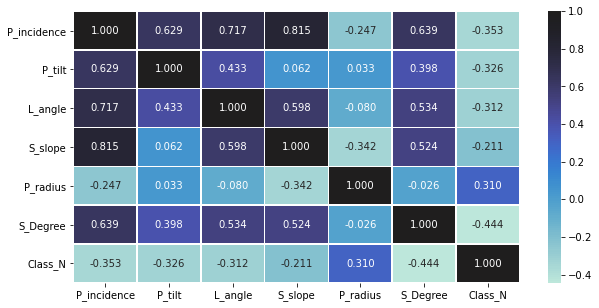

In [101]:
# Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(Databeforeenc2.corr(), annot=True, linewidths=.5, fmt= '.3f', center = 1 )  # heatmap
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.3 Dataset post outlier treatment  

In [102]:
#Copying the dataset which has been one hot encoded
Databeforeenc3 = Databeforeenc2.copy()

In [103]:
Databeforeenc3 = Databeforeenc3.drop(['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree'], axis=1)
Databeforeenc3

,Class,Class_N
0,Normal,1
1,Normal,1
2,Normal,1
3,Normal,1
4,Normal,1
...,...,...
305,Abnormal,0
306,Abnormal,0
307,Abnormal,0
308,Abnormal,0


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.4 Predictor/Feature attribute and Target attribute

In [104]:
# Predictor/ Feature attribute
x1 = Databeforeenc2.drop(['Class','Class_N'], axis=1) #The Predictor/Feature attribute would be P_incidence, P_tilt, L_angle, S_slope, P_radius, S_degree.

# Target attribute
y = Databeforeenc2[['Class_N']] #The Target attribute would be Class where 0 is Normal, 1 is Type_H and 2 is Type_S

In [105]:
y

,Class_N
0,1
1,1
2,1
3,1
4,1
...,...
305,0
306,0
307,0
308,0


In [106]:
x1

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.2 Perform normalisation or scaling if required

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.2.1 Min-Max Scaling

In [107]:
# We have to perform normalization/scaling to standardize the data - This is Min-Max scaling

X = (x1 - np.min(x1))/(np.max(x1)-np.min(x1))
X


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,0.119180,0.420085,0.188942,0.075642,0.618897,0.044331
1,0.277500,0.455882,0.336501,0.209004,0.599688,0.030400
2,0.175670,0.276858,0.294446,0.204049,0.635973,0.037366
3,0.213828,0.428799,0.304271,0.161942,0.633388,0.023620
4,0.188587,0.307480,0.255748,0.200578,0.646271,0.017852
...,...,...,...,...,...,...
305,0.520452,0.723338,0.636299,0.303548,0.596967,0.259195
306,0.668675,0.948527,0.402712,0.329098,0.286071,0.205635
307,0.462423,0.453297,0.555135,0.387776,0.627209,0.196569
308,0.593437,0.480838,0.714343,0.499216,0.546974,0.204350


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.3 Check for target balancing. Add your comments

* For Classification problems, accuracy is not ideally checked because the target is a categorical variable which is hot encoded into integer datatype with binary like values. However, this target attribute will define the accuracy based on count so there would be imbalances if one categorical value has more occurences than the other which will make the model only predict the other one.

* The following are the various techniques used to understand the imbalance in dataset. We will now check whether this dataset is imbalanced or not.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.3.1 Checking for Class Imbalance/ Imbalanced Datasets

Class 0: 210
Class 1: 100
Proportion: 2.1 : 1


Abnormal    210
Normal      100
Name: Class, dtype: int64

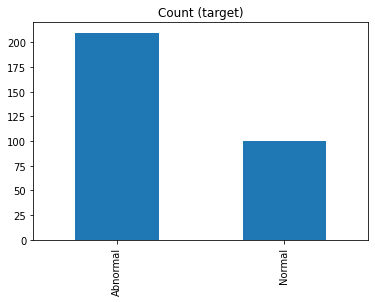

In [108]:
import numpy as np
import pandas as pd


target_count = Databeforeenc2.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')

target_count.plot(kind='bar', title='Count (target)');

target_count

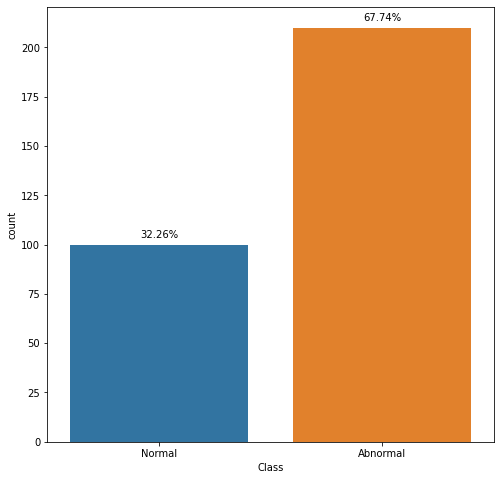

In [109]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(Datacombined2['Class'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = Datacombined2, x= 'Class') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(DataBeforeenc)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* From this it is understandable that the target variable is unevenly distributed where Abnormal has 67% while Normal has 33%, so majority of the data would assume Abnormal incase of KNN. That is around 210 of "Abnormal" and 100 of "Normal". 

If minority is within this percentage, then it is considered as :   <b>(Citation: Arora, Nisha. (2021). Re: How to know that our dataset is imbalance?)</b>.     
    
mild ---> 20-40% of the data set
    
Moderate ---> 1-20% of the data set
    
Extreme ---> <1% of the data set 
                 
In this case, the class attribute is mildly imbalanced at 33% (between 20-40%) but it is not required to be balanced as it is viable for the dataset.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.3.3 Checking for data imbalance with the metric trap

In [110]:
from xgboost import XGBClassifier #Enter this in the Anaconda shell to install this package: conda install -c mndrake xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_Sam = X
y_Sam = y

X_train_Sam, X_test_Sam, y_train_Sam, y_test_Sam = train_test_split(X_Sam, y_Sam, test_size=0.2, random_state=1)

model_Sam = XGBClassifier()
model_Sam.fit(X_train_Sam,  np.ravel(y_train_Sam,order='C'))
y_pred_Sam = model_Sam.predict(X_test_Sam)

accuracy_Sam = accuracy_score(y_test_Sam, y_pred_Sam)
print("Accuracy: %.2f%%" % (accuracy_Sam * 100.0))

[00:28:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 85.48%


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


* From the above model, we got accuracy of 85.48%

In [111]:
#Now we have to run the same code but with only 1 feature, this should ideally reduce the accuracy of classifier,
#if it does not then the dataset is unbalanced. 
model_Sam_1 = XGBClassifier()
model_Sam.fit(X_train_Sam[['S_slope']], np.ravel(y_train_Sam,order='C'))
y_pred_Sam_1 = model_Sam.predict(X_test_Sam[['S_slope']])

accuracy_Sam_1 = accuracy_score(y_test_Sam, y_pred_Sam_1)
print("Accuracy: %.2f%%" % (accuracy_Sam_1 * 100.0))

[00:28:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 61.29%


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


* From the above model, on running with only a single feature/attribute "S_slope", we got an accuracy of only 61.29%. Since, the accuracy is low, this indicates that the model is balanced. Since, ideally on reducing it should get reduced, which it has, hence it is balanced

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.3.4 Checking for the predictability with the Confusion Matrix

<ipython-input-112-62b19ba77671>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)


Confusion matrix:
 [[39  5]
 [ 4 14]]


<ipython-input-112-62b19ba77671>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


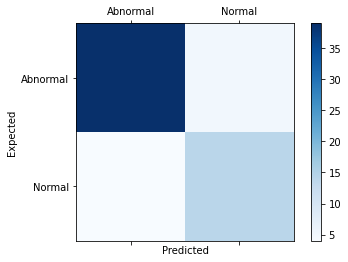

In [112]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test_Sam, y_pred=y_pred_Sam)
print('Confusion matrix:\n', conf_mat)

labels = ['Abnormal', 'Normal']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

* The diagonal value indicates the correctness in the prediction, hence, in the above model as the diagonal values are high, it indicates the correctness of the prediction. Higher the diagonal values, the better the prediction.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.3.4 Comments on Target Balancing

<font size="3">1) The target balancing is performed in the dataset to balance out the target attributes so that the prediction is not based off the highest occuring class category, hence, in this case, we have balanced the dataset because of the imbalance in the proportion where Abnormal has 67% while Normal has 33%, so majority of the data would assume Abnormal incase of KNN. That is around 210 of "Abnormal" and 100 of "Normal". 
    
Degree of imbalance Proportion of Minority Class  <b>(Citation: Arora, Nisha. (2021). Re: How to know that our dataset is imbalance?)</b>.   
    
    
mild ---> 20-40% of the data set
    
Moderate ---> 1-20% of the data set
    
Extreme ---> <1% of the data set 

In this case, the class attribute is mildly imbalanced at 33% (between 20-40%) but it is not required to be balanced as it is viable for the dataset.
                
2) Metric trap is another method to check for data imbalances, in this case, a model is build and accuracy is tested, we got accuracy of 85.48% with XGBClassifier. Then afterwards, we only include 1 attribute and run the model again, if the accuracy doesnt decrease then that means the data is imbalanced. In this case, the accuracy reduced to 61.29% after training and testing the dataset using only "S_Slope" attribute.
                 
3) Confusion matrix is another method to understand how the data is predicting, and is the most important method because most of our inference will be from the confusion matrix. Here, in this case, the confusion matrix is color coded to only indicate high or low concentration of predictions. The predicted count on the left diagonal is the true positives and true negatives. Here, majority were in the diagonal, indicating that the majority data of the data is correctly predicted.
                 
</font>


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 4.4 Perform train-test split.

**After target balancing, these are the new predictor and target attributes**

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.4.1 Train-Test split

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size=0.3, random_state = 12)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.4.2 Data Shape

In [114]:
# Checking shape of Train dataset (70%)
print(x_train.shape) 
print(y_train.shape) 

(217, 6)
(217, 1)


In [115]:
# Checking shape of Test dataset (30%)
print(x_test.shape)
print(y_test.shape)

(93, 6)
(93, 1)


<font size="5"><p style="color:black"> <b> 5. Model training, testing and tuning:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.1 Design and train a KNN classifier

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.1 KNN Model at K = 3

In [116]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, np.ravel(y_train,order='C'))
# predict the response
y_pred_1 = knn.predict(x_test)
y_pred_1T = knn.predict(x_train)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.2 KNN Model at K = 5

In [117]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(x_train, np.ravel(y_train,order='C'))

# predict the response
y_pred_2 = knn.predict(x_test)
y_pred_2T = knn.predict(x_train)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.3 KNN Model at K = 9

In [118]:
# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(x_train, np.ravel(y_train,order='C'))

# predict the response
y_pred_3 = knn.predict(x_test)
y_pred_3T = knn.predict(x_train)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.2 Display the classification accuracies for train and test data

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.1 Train Dataset

In [119]:
# evaluate accuracy of K = 3 for train dataset
print("Accuracy of K = 3 for train ds is:",accuracy_score(y_train, y_pred_1T))
# evaluate accuracy of K = 5 for test dataset
print("Accuracy of K = 5 for train ds is:",accuracy_score(y_train, y_pred_2T))
# evaluate accuracy of K = 9 for test dataset
print("Accuracy of K = 9 for train ds is:",accuracy_score(y_train, y_pred_3T))

Accuracy of K = 3 for train ds is: 0.8894009216589862
Accuracy of K = 5 for train ds is: 0.8294930875576036
Accuracy of K = 9 for train ds is: 0.8248847926267281


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.2 Test Dataset

In [120]:
# evaluate accuracy of K = 3 for test dataset
print("Accuracy of K = 3 for test ds is:",accuracy_score(y_test, y_pred_1))
# evaluate accuracy of K = 5 for test dataset
print("Accuracy of K = 5 for test ds is:",accuracy_score(y_test, y_pred_2))
# evaluate accuracy of K = 9 for test dataset
print("Accuracy of K = 9 for test ds is:",accuracy_score(y_test, y_pred_3))

Accuracy of K = 3 for test ds is: 0.7311827956989247
Accuracy of K = 5 for test ds is: 0.8172043010752689
Accuracy of K = 9 for test ds is: 0.8172043010752689


* From the above KNN Classification model, it is observed that the model accuracy for train is higher than test. Hence, would be an accurate representation of the model indicating that there are no imbalances.

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.3 Display and explain the classification report in detail

### For the Classification report, we're selecting K = 5 KNN Model

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.1 Precision, Recall, F-Score, and Support for Normal and Abnormal

Classification accuracy is the total number of correct predictions divided by the total number of predictions made for a dataset.

As a performance measure, accuracy is inappropriate for imbalanced classification problems.

The main reason is that the overwhelming number of examples from the majority class (or classes) will overwhelm the number of examples in the minority class, meaning that even unskillful models can achieve accuracy scores of 90 percent, or 99 percent, depending on how severe the class imbalance happens to be.

An alternative to using classification accuracy is to use precision and recall metrics.

**Precision** - it is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Recall = TP/TP+FN

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support** - It is the number of occurrences of each class in y_true.



**Train Dataset at K = 5 for KNN model**

In [121]:
#For Train dataset at K = 5 KNN

from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_train, y_pred_2T)

print('Precision for Abnormal:', precision[0])
print('Precision for Normal:', precision[1],'\n')


print('recall for Abnormal:', recall[0])
print('recall for Normal:', recall[1],'\n')


print('fscore for Abnormal:', fscore[0])
print('fscore for Normal:', fscore[1],'\n')


print('support for Abnormal:', support[0])
print('support for Normal:', support[1],'\n')


Precision for Abnormal: 0.8733333333333333
Precision for Normal: 0.7313432835820896 

recall for Abnormal: 0.8791946308724832
recall for Normal: 0.7205882352941176 

fscore for Abnormal: 0.8762541806020067
fscore for Normal: 0.7259259259259259 

support for Abnormal: 149
support for Normal: 68 



We have observed that:
* Abnormal has higher precision at 0.873, higher recall at 0.879, higher fscore at 0.876 and higher support at 149
* Normal has lower precision at 0.731, lower recall at 0.720, lower fscore at 0.725 and lower support at 68

**Test Dataset at K = 5 for KNN model**

In [122]:
#For Test dataset at K = 5 KNN

precision, recall, fscore, support = score(y_test, y_pred_2)

print('Precision for Abnormal:', precision[0])
print('Precision for Normal:', precision[1],'\n')


print('recall for Abnormal:', recall[0])
print('recall for Normal:', recall[1],'\n')


print('fscore for Abnormal:', fscore[0])
print('fscore for Normal:', fscore[1],'\n')


print('support for Abnormal:', support[0])
print('support for Normal:', support[1],'\n')

Precision for Abnormal: 0.8333333333333334
Precision for Normal: 0.7777777777777778 

recall for Abnormal: 0.9016393442622951
recall for Normal: 0.65625 

fscore for Abnormal: 0.8661417322834646
fscore for Normal: 0.711864406779661 

support for Abnormal: 61
support for Normal: 32 



We have observed that:

* Abnormal has higher precision at 0.833, higher recall at 0.901, higher fscore at 0.866 and higher support at 61
* Normal has lower precision at 0.777, lower recall at 0.656, lower fscore at 0.711 and lower support at 32 

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.2 Confusion Matrix for KNN

**Confusion Matrix for Train dataset**

Confusion Matrix


<AxesSubplot:>

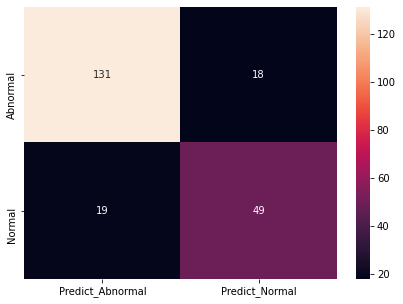

In [123]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_train, y_pred_2T)

df_cm = pd.DataFrame(cm, index = [i for i in ["Abnormal","Normal"]],columns = [i for i in ["Predict_Abnormal","Predict_Normal"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

True Positives (TP): we correctly predicted "Bottom right" True positives (Normal to Predict_Normal)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Abnormal to Predict_Abnormal)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Abnormal were actually normal

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as normal were abnormal, this is worse because the individuals that are abnormal will not pursue further in checking their condition.

* In this, about 180 were predicted correctly and 37 were incorrectly predicted out of 217. Thats about 82.9% accura 17.1% inaccurate

**Confusion Matrix for Test dataset**

Confusion Matrix


<AxesSubplot:>

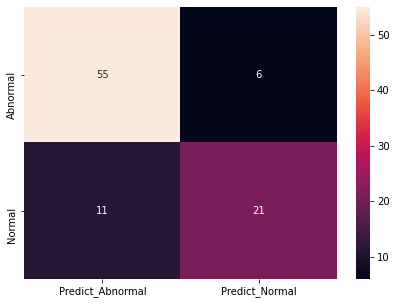

In [124]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred_2)

df_cm = pd.DataFrame(cm, index = [i for i in ["Abnormal","Normal"]],columns = [i for i in ["Predict_Abnormal","Predict_Normal"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

True Positives (TP): we correctly predicted "Bottom right" True positives (Normal to Predict_Normal)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Abnormal to Predict_Abnormal)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Abnormal were actually normal

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as normal were abnormal, this is worse because the individuals that are abnormal will not pursue further in checking their condition.

* In this, about 76 were predicted correctly and 17 were incorrectly predicted out of 93. That is about 81.72% accurate and 18.28% inaccurate.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.3 ROC Curve

**Defining ROC Curve**

In [125]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**ROC Curve for Train set**

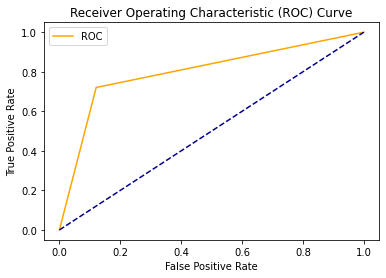

Area under the curve:  0.7998914330833005


In [126]:
# Loading the probability values for positive class
y_prob = knn.predict_proba(x_train)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_2T, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**ROC Curve for Test set**

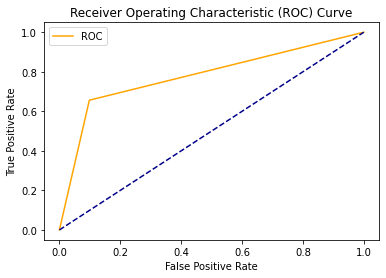

Area under the curve:  0.7789446721311475


In [127]:
# Loading the probability values for positive class
y_prob = knn.predict_proba(x_test)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_2, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.4 Precision-Recall Curve

Area under the curve:  0.7789446721311475
Best Threshold=1.000000, F-Score=0.712


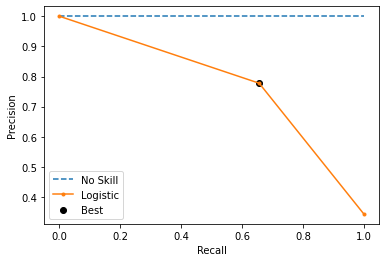

In [128]:
from sklearn.metrics import precision_recall_curve
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

# Calculating the Precision, Recall and the threshold values
precisionB, recallB, thresholdsB = precision_recall_curve(y_test, y_pred_2)

# Calculate the f score for all threshold values
fscoreB = (2 * precisionB * recallB) / (precisionB + recallB)

# Locate the index of the largest f score
ixB = np.argmax(fscoreB)

# Display the Best cutoff point based on the best f score
print('Best Threshold=%f, F-Score=%.3f' %(thresholdsB[ixB], fscoreB[ixB]))

# Plot the precision-recall curve for the model
no_skillB = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skillB,no_skillB], linestyle='--', label='No Skill')
plt.plot(recallB, precisionB, marker='.', label='Logistic')
plt.scatter(recallB[ixB], precisionB[ixB], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [129]:
# Create and display the dataframe of all metric values
df_scores_knn = pd.DataFrame({'precision' : pd.Series(precisionB),
                    'recall' : pd.Series(recallB), 
                    'fscore' : pd.Series(fscoreB), 
                    'thresholds' : pd.Series(thresholdsB)})
df_scores_knn

,precision,recall,fscore,thresholds
0,0.344086,1.00000,0.512000,0.0
1,0.777778,0.65625,0.711864,1.0
2,1.000000,0.00000,0.000000,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.35 Root mean square error (RMSE)

**RMSE for Train Data**

In [130]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_pred_2T)
rmse = sqrt(mse)
print("Root mean square error for Train Data is",rmse)

Root mean square error for Train Data is 0.4129248266239223


**RMSE for Test Data**

In [131]:
mse = mean_squared_error(y_test, y_pred_2)
rmse = sqrt(mse)
print("Root mean square error for Test Data is",rmse)

Root mean square error for Test Data is 0.42754613660367835


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.4 Automate the task of finding best values of K for KNN.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.4.1 Finding best K Value for KNN using GridSearchCV

The reason why best K value is automated is: 

* If you use one neighbor only, the prediction can strongly change from one point to the other.

* If you have multiple data points, the impact of one extremely different neighbor will be much less.

* If you use too many neighbors, the prediction of each point risks being very close. 

For finding best values of K: GridSearchCV is used as it repeatedly fits kNN regressors on a part of the data and tests the performances on the remaining part of the data. Doing this repeatedly will yield a reliable estimate of the predictive performance of each of the values for k.


In [132]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(3,50,2)} #Only odd values for KNN
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(x_train, np.ravel(y_train,order='C'))

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 50, 2)})

In [133]:
# Score from Gridsearch
print("Score after gridsearch K value optimization is",gridsearch.best_score_)

Score after gridsearch K value optimization is 0.8110993657505287


In [134]:
print("Best nearest neighbour (K) is",gridsearch.best_params_)

Best nearest neighbour (K) is {'n_neighbors': 23}


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.5 Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.5.1 HyperParameter Tuning with GridSearchCV

In [135]:
grid_params = { 'n_neighbors' : range(3,50,2),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan'] }

In [136]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=8, n_jobs = -1)

In [137]:
# fit the model on our train set
g_res = gs.fit(x_train, np.ravel(y_train,order='C'))

Fitting 8 folds for each of 144 candidates, totalling 1152 fits


In [138]:
print("Score after gridsearch optimization is",g_res.best_score_)

Score after gridsearch optimization is 0.8247354497354498


In [139]:
print(g_res.best_params_)

{'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'distance'}


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.5.2 Hyperparameter Tuning with KNN default

In [140]:
knn = KNeighborsClassifier(n_neighbors = 23, algorithm = 'brute',metric = 'minkowski',weights ='distance')
knn.fit(x_train,np.ravel(y_train,order='C'))

KNeighborsClassifier(algorithm='brute', n_neighbors=23, weights='distance')

In [141]:
y_hat = knn.predict(x_train)
y_knn = knn.predict(x_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.5.3 Accuracy

In [142]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.8279569892473119


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.5.4 Root Mean Square Error Value

**Training Set**

In [143]:
mse8 = mean_squared_error(y_train, y_hat)
rmse = sqrt(mse8)
print("Root mean square error for Test Data is",rmse)

Root mean square error for Test Data is 0.0


**Test Set**

In [144]:
mse9 = mean_squared_error(y_test, y_knn)
rmse = sqrt(mse9)
print("Root mean square error for Test Data is",rmse)

Root mean square error for Test Data is 0.4147806778921701


**ROC Curve for Train set**

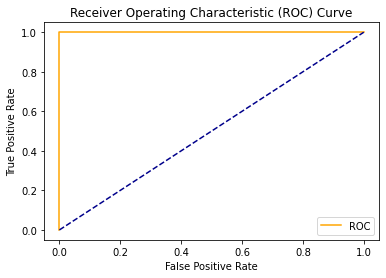

Area under the curve:  1.0


In [145]:
# Loading the probability values for positive class
y_prob = knn.predict_proba(x_train)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_hat, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**ROC Curve for Test set**

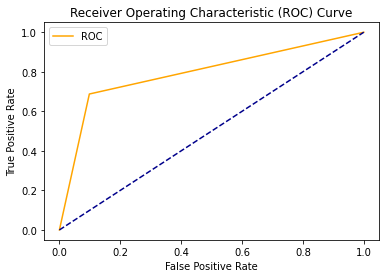

Area under the curve:  0.7945696721311476


In [146]:
# Loading the probability values for positive class
y_prob = knn.predict_proba(x_test)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_knn, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.5.5 Precision-Recall Curve

Area under the curve:  0.7945696721311476
Best Threshold=1.000000, F-Score=0.733


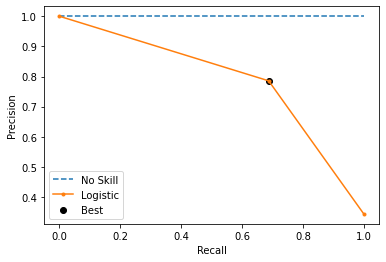

In [147]:
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

# Calculating the Precision, Recall and the threshold values
precisionC, recallC, thresholdsC = precision_recall_curve(y_test, y_knn)

# Calculate the f score for all threshold values
fscoreC = (2 * precisionC * recallC) / (precisionC + recallC)

# Locate the index of the largest f score
ixC = np.argmax(fscoreC)

# Display the Best cutoff point based on the best f score
print('Best Threshold=%f, F-Score=%.3f' %(thresholdsC[ixC], fscoreC[ixC]))

# Plot the precision-recall curve for the model
no_skillC = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skillC,no_skillC], linestyle='--', label='No Skill')
plt.plot(recallC, precisionC, marker='.', label='Logistic')
plt.scatter(recallC[ixC], precisionC[ixC], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [148]:
# Create and display the dataframe of all metric values
df_scores_knn = pd.DataFrame({'precision' : pd.Series(precisionC),
                    'recall' : pd.Series(recallC), 
                    'fscore' : pd.Series(fscoreC), 
                    'thresholds' : pd.Series(thresholdsC)})
df_scores_knn

,precision,recall,fscore,thresholds
0,0.344086,1.0000,0.512000,0.0
1,0.785714,0.6875,0.733333,1.0
2,1.000000,0.0000,0.000000,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.5.8 Confusion Matrix

**Train Set**

Confusion Matrix


<AxesSubplot:>

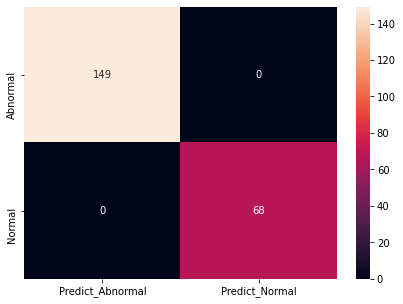

In [149]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_train, y_hat)

df_cm = pd.DataFrame(cm, index = [i for i in ["Abnormal","Normal"]],columns = [i for i in ["Predict_Abnormal","Predict_Normal"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

True Positives (TP): we correctly predicted "Bottom right" True positives (Normal to Predict_Normal)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Abnormal to Predict_Abnormal)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Abnormal were actually normal

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as normal were abnormal, this is worse because the individuals that are abnormal will not pursue further in checking their condition.

* In this, about 217 were predicted correctly and 0 were incorrectly predicted out of 217. That is about 100% accurate and 0.00% inaccurate.

**Test Set**

Confusion Matrix


<AxesSubplot:>

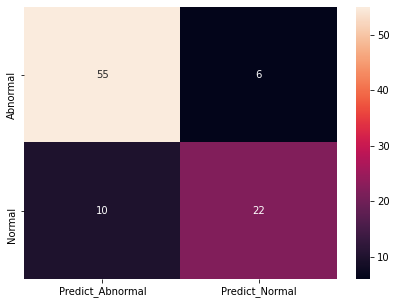

In [150]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_knn)

df_cm = pd.DataFrame(cm, index = [i for i in ["Abnormal","Normal"]],columns = [i for i in ["Predict_Abnormal","Predict_Normal"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

True Positives (TP): we correctly predicted "Bottom right" True positives (Normal to Predict_Normal)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Abnormal to Predict_Abnormal)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Abnormal were actually normal

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as normal were abnormal, this is worse because the individuals that are abnormal will not pursue further in checking their condition.

* In this, about 77 were predicted correctly and 16 were incorrectly predicted out of 93. That is about 82.79% accurate and 17.2% inaccurate.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.5.3 Comments for model selection

<font size="3">• The model selection is critically chosen based on Precision,Recall, f1-score, AUC values, because when Hypertuning KNN which is a classification model, we dont rely on accuracy.</font>

<font size="3">• In this case, the dataset was scaled and target 'class' attribute was hot encoded after unifying the Abnormal categories(Type_S,Type_H). </font>

<font size="3">• The reason why this model after hyperparameter tuning is the best, is because of the following:</font>

<font size="3">**A) Before Hyperparameter Tuning:**</font>

<font size="3">  1) Accuracy = 0.817</font>

<font size="3">  2) Precision = 0.777</font>

<font size="3">  3) Recall = 0.656</font>

<font size="3">  4) F-Score = 0.711</font>

<font size="3">  5) Area under the curve value (from ROC) = 0.778</font>
  
<font size="3">  6) K value = 5</font>
  
<font size="3">  7) RMSE = 0.427</font>

<font size="3">  8) Confusion matrix = 76 predicted correctly and 17 predicted incorrectly out of 93</font>
  
  
<font size="3">**B) After Hyperparameter Tuning:**</font>
  
<font size="3">  1) Accuracy = 0.827</font>

<font size="3">  2) Precision = 0.785</font>

<font size="3">  3) Recall = 0.687</font>

<font size="3">  4) F-Score = 0.733</font>

<font size="3">  5) Area under the curve value (from ROC) = 0.794</font>
  
<font size="3">  6) K value = 23</font>
  
<font size="3">  7) RMSE = 0.414</font>

<font size="3">  8) Confusion matrix = 77 were predicted correctly and 16 were incorrectly predicted out of 93. That is about 82.79% accurate and 17.2% inaccurate.  </font> 
  

<font size="3">• In Hyperparameter Tuning, the various Hyperparameters used to improve the model were : K value, K-fold Cross validation splitting strategy (cv), weights, metrics</font>

<font size="3">• In that, the following settings were K-value = 23, K-fold Cross validation (cv) = 8, weights = distance, metrics = Minkowski, n_jobs = -1.</font>

<font size="3">**Explanation of each Hyperparamter:**</font>

<font size="3">  a) K-value is based on which the target attribute finds the k nearest neighbour, in this case, it finds the nearest 23 values   and assumes the target as such. </font>
  
<font size="3">  b) K-fold cross validation splitting strategy (cv) compares multiple hyperparameter with the model and in this case splits  i   into 8 different models with different hyperparameter values etc.</font>
  
<font size="3">  c) weights is a functionality that gives more weightage to points in this case, for 'distance', so the closer the points,       more   the weightage, better the model.</font>
  
<font size="3">  d) metrics is the distance parameter the model uses, the distance 'Minkowski' selects based on Manhattan and Euclidean         distance measure.</font>
  
<font size="3">• This model has been tuned with all the features, hyperparameters, and libraries available. </font>

<font size="3"><b>Reason why this is the best hypertuned model for KNN Classifier</b> </font>
        
<font size="3">1) 1% increase in accuracy</font>
    
<font size="3">2) 0.8% increase in Precision</font>
    
<font size="3">3) 3.1% increase in Recall</font>

<font size="3">4) 2.2% increase in F-Score</font>

<font size="3">5) 1.3% decrease in RMSE (Root mean square error)

<font size="3">6) 1.6 % increse in AUC (Area under the curve)
</font>

<font size="5"><p style="color:black"> <b> 6. Conclusion and improvisation:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 6.1 Write your conclusion on the results.

<font size="3">• The conclusion for the results are as follows:</font>

<font size="3"><b>1) Import and warehouse data:</b>

The conclusion for Import and warehouse data is, importing of the 3 datasets and compiling them to make a single dataset to get all values under one dataset. The columns were the same so they were directly appended together without any issues. They had a final data shape of (310,7)

<font size="3"><b>2) Data cleansing:</b>

The conclusion for Data cleansing is the correction of the data in the dataset where there were repeated Class attribute values such as (Normal , Nrmal), (Type_H, type_h), and (Type_S,tp_s). These were concatenated as one to remove duplicate values from the dataset as part of Data cleansing. Also as part of Data cleansing, additionally, the Class values "Type_H" and "Type_S" were merged into a separate categorical value that is "Abnormal", this is done to make it easier for model building. There were duplicated index from merging the 3 datasets which was corrected and the dataset had no null values or repeated values in the dataset.</font>
    
<font size="3"><b>3) Data analysis & visualisation:</b></font>
    
The conclusion for Data analysis & visualisation is as follows,

<font size="3"><p style="color:blue"><b>a)</b> Univariate analysis: </p>
    
I) we have observed that the dataset's structure is bimodal in nature, hence will follow Chebyshevs rule of inequality, but is not required, as it can be normalized for further modelling of the dataset. 
    
II) The Class's categorical value "Abnormal" has higher count than that of "Normal". Within Abnormal, Type_S has the higher count, then follows "Normal", and finally "Type_H".
    
III) These are the various categories/attributes present in the dataset, we found that, they have:   
    
>P_incidence= 3 outliers, left skewed, flat peak 
    
>P_tilt = 13 outliers, right skewed, flat peak
    
>L_angle = 1 outlier, right skewed, flat peak
    
>S_slope = 1 outlier, right skewed, highly sharp peak
    
>P_radius = 11 outlier, left skewed, sharp peak
    
>S_Degree = 10 outlier, right skewed, highly sharp peak
    
>Total = 39 outliers</font>
    
<font size="3"><p style="color:blue"><b>b)</b> Bivariate analysis:</p> 
    
I) The abnormal and normal classes against the rest of the attributes in the dataset:
    
>P_incidence = Type_S>Normal>Type_H 
    
>P_tilt = Type_S>Type_H>Normal
    
>L_angle = Type_S>Normal>Type_H 
    
>S_slope = Type_S>Normal>Type_H 
    
>P_radius = Normal>Type_H>Type_S
    
>S_Degree = Type_S>Type_H>Normal

II) Correlation analysis indicated the following:

>P_incidence - +vely correlated with all except P_radius to which it is -vely correlated
    
>P_tilt = +vely correlated with all except P_radius to which it is -vely correlated
    
>L_angle = +vely correlated with all except P_radius to which it is -vely correlated
    
>S_slope = +vely correlated with all except P_radius to which it is -vely correlated
    
>P_radius = -vely correlated with all
    
>S_Degree = +vely correlated with all except P_radius to which it is -vely correlated</font>
    
<font size="3"><p style="color:blue"><b>c)</b> Multivariate analysis:</p>
    
I) The Class "Normal" and "Abnormal" categorical values are plotted against all attributes in the dataset
      
>P_incidence = For "Normal" categorical value, it is +vely correlated with L_angle, S_slope, P_tilt and -vely correlated with P_radius and no correlation with S_Degree. For "Abnormal" it is +vely correlated with L_angle, S_slope, P_tilt, S_Degree and -vely correlated with P_radius.
    
>P_tilt = For "Normal" categorical value, it is +vely correlated with L_angle and -vely correlated with P_radius and no correlation with S_Degree and S_slope. For "Abnormal", it is +vely correlated with L_angle and P_radius and no correlation with S_Degree and S_slope.
    
>L_angle = For "Normal" categorical value it is +vely correlated with S_slope and -vely correlated with P_radius and no correlation with S_Degree. For "Abnormal", it is +vely correlated with S_slope and S_Degree and has no correlation with P_radius.
    
>S_slope = For "Normal" categorical value, it is -vely correlated with P_radius and no correlation with S_Degree. For "Abnormal", it is +vely correlated with S_Degree and -vely correlated with P_radius
    
>P_radius = For "Normal" categorical value, it has no correlation with S_Degree. For "Abnormal", it is +vely correlated with S_Degree.
 
II) Correlation analysis with heatmap to understand the distribution of data and how the attributes are correlated with one another in a numerical manner.
    
III) Spearmans correlation coefficient  with headmap to understand the correlation coefficient (rho) and p-value, it is as follows:
    
>P_incidence = +ve correlation with P_tilt, L_angle, S_slope, S_Degree and -ve correlation with P_radius and all are statistically significant as p-value < 0.05
    
>P_tilt = +ve correlation with P_incidence, L_angle, S_slope, S_Degree and -ve correlation with P_radius and all are statistically significant as p-value < 0.05 except for P_radius which has p-value higher than 0.05.
    
>L_angle = +ve correlation with  P_incidence, S_slope, S_Degree, P_tilt and -ve correlation with P_radius and all are statistically significant as p-value < 0.05 
    
>S_slope = +ve correlation with  P_incidence, L_angle, S_Degree, P_tilt and -ve correlation with P_radius and all are statistically significant as p-value < 0.05
    
>P_radius = -ve correlation with  P_incidence, L_angle, S_Degree, P_tilt S_slope and all are statistically significant as p-value < 0.05 
    
>S_Degree = +ve correlation with  P_incidence, S_slope, L_angle, P_tilt and -ve correlation with P_radius and all are statistically significant as p-value < 0.05. </font>   
    
<font size="3"><b>4) Data pre-processing: </b></font>
    
<font size="3"> I) In Data pre-processing, the datasets were one-hot encoded/label encoded, here, we have selected the dataset where 'class' has only 2 categories - ("Abnormal" = 0) and ("Normal" = 1) instead of the dataset with ("Type_S" = 2), ("Types_H" = 1), and ("Normal" = 0). This is for better modelling to prevent data stretching and to get higher scores. 
    
II) The Dataset with the 2 categories after one hot encoding is now selected for predictor and target. Here the predictor would be the attributes P_incidence, P_tilt, L_angle, S_slope, P_radius, and S_degree. While the target attribute would be Class. This is because, we're trying to estimate whether the predictor attributes can form a pattern and predict the corresponding class category "Abnormal" or "Normal".
    
III) After the predictor and target attribute were determined, the predictor attribute is scaled/normalized with Min-Max Scaling to get better data accuracy and better predictability. Also, due to the bimodal nature of the dataset, normalizing would give the appropriate distribution of data. 
    
IV) After normalizing/scaling, the dataset is verified on whether it has imbalances so target balancing. The target balancing is checked in the dataset to see whether we have to balance out the target attributes so that the prediction is not based off the highest occuring class category. Target balancing is not performed as the data is not extremely skewed and is only mild imbalance. 
    
>a) In this case, Barplot to see distribution of Target attribute "Abnormal" and "Normal", here the "Abnormal" has 67.74% and "Normal" has only 32.26%. , so majority of the data would assume Abnormal incase of KNN. That is around 210 of "Abnormal" and 100 of "Normal". 
    
>Degree of imbalance Proportion of Minority Class <b>(Citation: Arora, Nisha. (2021). Re: How to know that our dataset is imbalance?)</b>.      
    
If minority is within this percentage, then it is considered as :    
    
mild ---> 20-40% of the data set
    
Moderate ---> 1-20% of the data set
    
Extreme ---> <1% of the data set 
                 
In this case, the class attribute is mildly imbalanced at 33% (between 20-40%) but it is not required to be balanced as it is viable for the dataset.
                
>d) Metric trap is another method to check for data imbalances, in this case, a model is build and accuracy is tested, we got accuracy of 85.48% with XGBClassifier. Then afterwards, we only include 1 attribute and run the model again, if the accuracy doesnt decrease then that means the data is imbalanced. In this case, the accuracy reduced to 61.29% after training and testing the dataset using only "S_Slope" attribute.
                 
>e) Confusion matrix is another method to understand how the data is predicting, and is the most important method because most of our inference will be from the confusion matrix. Here, in this case, the confusion matrix is color coded to only indicate high or low concentration of predictions. The predicted count on the left diagonal is the true positives and true negatives. Here, majority were in the diagonal, indicating that the majority data of the data is correctly predicted.
 
V) After checking for data imbalances, we have to split the model into test and train, here, we have selected 0.7 for train and 0.3 for test with random_state = 12. The data is now split into train (x,y) which has 140 rows and test (x,y) which has 60 rows.
    
<font size="3"><b>5) Model training, testing and tuning: </b></font>   
    
I) Model is designed, trained and tuned with KNN (K-nearest neighbour) classifier which is assumes the nearest value, in this case, it can be "Normal" or "Abnormal", it will predict "Normal" or "Abnormal" from the dataset. Here, we selected K = 5 for the KNN classifier, where we got accuracies Train : 0.829 (82.9%) and Test : 0.817 (81.7%). 
    
II) The model is now checked for the precision, recall, f-score, confusion matrix, ROC curve's AUC, and RMSE
    
>Accuracy = 0.817 (81.7%)

>Precision = 0.777 (77.7%)

>Recall = 0.656 (65.6%)

>F-Score = 0.711 (71.1%)

>Area under the curve value (from ROC) = 0.778 (77.8%)
  
>K value = 5 
  
>RMSE = 0.427 (42.7%)

>Confusion matrix = 76 predicted correctly and 17 predicted incorrectly out of 93

III) Then, after which the best value for K is estimated with GridsearchCV library, with which, we have found to be K = 23 is the best K value for the KNN Classifier and score of 0.811 (81.1%)
    
IV) Using GridsearchCV library, we have used all the tuning techniques and Hyperparameters available to create the best model for this classifier. The following are the Hyperparameters used to improve the model: K value, K-fold Cross validation splitting strategy (cv), weights, metrics. In that, the following settings were K-value = 23, K-fold Cross validation (cv) = 8, weights = distance, metrics = Minkowski, n_jobs = -1.
    
V) After the Hyperparamter tuning, we have observed the following:
  
>Accuracy = 0.827 (82.7%)

>Precision = 0.785 (78.5%)

>Recall = 0.687 (68.5%)
    
>F-Score = 0.733 (73.3%)

>Area under the curve value (from ROC) = 0.794 (79.4%)
  
>K value = 23
  
>RMSE = 0.414 (41.4%)

>Confusion matrix = 77 were predicted correctly and 16 were incorrectly predicted out of 93. That is about 82.79% accurate and 17.2% inaccurate. 
    
VI) Reason why this is the best hypertuned model for KNN Classifier
        
>1% increase in accuracy
    
>0.8% increase in Precision
    
>3.1% increase in Recall

>2.2% increase in F-Score

>1.3% decrease in RMSE (Root mean square error)

>1.6 % increse in AUC (Area under the curve)
    
These factors highlight the reason for the model to be the best tuned model for KNN Classifier.

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 6.2 Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future.

<font size="4">Three datasets with 6 information of biomechanical features/attributes and 1 target attribute was provided for data analysis and data modelling.</font>
    
<font size="4">I)"Part1 - Normal.csv"</font>

<font size="4">II)"Part1 - Type_H.csv" </font>

<font size="4">III)"Part1 - Type_S.csv"  </font>
    
<font size="4">The detailed suggestions/improvements on the data points collected are the following:
    
<b>1) Quality of the dataset</b>
    
The data collection methods needs to be improved as the data had duplicate categorical names such as (Normal , Nrmal), (Type_H, type_h), and (Type_S,tp_s) and also instead of having three separate datasets, there couldve been one dataset which was pre processed and selected for data analysis. The issue that occured was that, there were duplicate index, which had been screened and fixed on detection.
    
<b>a)</b> The quality of the dataset can be improved by collecting information without any missing values or should be complete/comprehensive.
    
<b>b)</b> The consistency of the dataset should be the same and no room for manual errors as that would deviate the interpretation/inference.
    
<b>c)</b> The data should be accurate and should match with the actual observation.
    
<b>d)</b> The data didn't have any information about the attributes and were just labelled as such:
    
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_Degree
7. Class

•This made it harder to understand and interpret the data. As the attributes cannot be associated with each other in any other way except statistically and computationally. More information on the attributes would help understand how each attribute would play a role in contributing to the Class target attribute. Also the Class target attribute had labels such as "Normal", "Type_S", "Type_H" but was not expanded or didnt have details pertaining to it which made it hard to relate and perform data modelling. 
    
<b>e)</b>The domain for the dataset was declared to be "Healthcare" and the "Biomechanical features of Patients" was part of data description, the Class was then only understood to be the conditions of different patients. So from there, it was interpreted to be "Normal" and "Abnormal" where "Abnormal" consisted of "Type_S" and "Type_H". However, it would've been much easier, if the data was provided with more details for easier understanding, processing and modelling.
    
<b>f)</b> The timeframe for recording the data can be given which will give a point of reference and will give more inference.
    
</font>

<font size="4"><b> 2) Quantity of the dataset</b>

•In datacollection, the quantity of the data is looked at as the most important factor as the more the quantity of the data, the more information that can be interpreted, hence, when looking at data quantity, more attributes, even meaningless information can be added which can be correlated with statistics and can potentially give inference.
    
•The quantity should be there for the data but if the data is inaccurate or is not valid then the whole data analysis step becomes a waste of time. Hence, the priority should be to obtain consistent data regardless of quantity, and if accurate and large quanitity data is brought, we can understand hidden patterns and model it for improving business etc. </font>

<font size="4"><b> 3) Variety of the dataset</b>
    
•The dataset only had 6 features with which we had to predict the target attribute with. However, with more number of attributes, the more the accuracy and better the data balance. In this case, the target attribute with "Abnormal" and "Normal" was around 70:30 in ratio. This means that the data is leaning more towards "Abnormal" instead of "Normal". Hence, the predictability would be affected. 
    
•It can be improved with more number of data and  attributes, more the accuracy. This would result in giving better predictive outputs with higher accuracy. </font>

    


<font size="4"><b> 4) Velocity of the dataset</b> 

The datasets in this project is definitely a high velocity dataset because data has over 310 rows and 7 columns/attributes. However, the high velocity datasets are always not the best, even though the data is automated, small errors or deviations can lead to predicting a completely different result. Thats why data velocity also matters. </font>

<font size="4"><b> 5) Veracity of the dataset</b> 
    
•The veracity is the most important aspect in the dataset which addresses Quality, quanity, varienty and velocity of the data. The veracity is the accuracy of the data, where the information should make sense and should be able to give expected results. The main purpose of veracity is the analysis of dataset before submitting it, it is checked on whether the data has missing, duplicates, null, irrelevant values and filtered out. 
    
•The accuracy of the dataset can be predicted using Machine Learning Algorithms, the accuracy would be prediction of a target class and this prediction would help understand hidden patterns for the dataset. However, there are limitations to this as well, if the data or input information is inaccurate, the output accuracy would not matter at all. This could be very expensive in case it is part of business requirements.

<font size="4"><p style="color:green"> The above points are both the improvements as well as the ideal ways for data processing, which is an essential part of data analysis and data modelling </font>